# Обработка данных и создание единого Data Frame

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from pathlib import Path
path = Path('/content/drive/MyDrive/Объединение таблиц (Алмазова)')

## Только неблагоприятные исходы

In [ ]:
import pandas as pd
df1 = pd.read_csv(path/'результат/неблагоприятные исходы/new data 15_19 i20.0.csv', encoding="Windows-1251")
df2 = pd.read_csv(path/'результат/неблагоприятные исходы/new data 15_19 i21.4.csv', encoding="Windows-1251")
df3 = pd.read_csv(path/'результат/неблагоприятные исходы/new data 15_19 i21.9.csv', encoding="Windows-1251")
df4 = pd.read_csv(path/'результат/неблагоприятные исходы/new data 15_19 i22.8.csv', encoding="Windows-1251")
df5 = pd.read_csv(path/'результат/неблагоприятные исходы/new data 22_24 i20.0.csv', encoding="Windows-1251")
df6 = pd.read_csv(path/'результат/неблагоприятные исходы/new data 22_24 i21.4.csv', encoding="Windows-1251")
df7 = pd.read_csv(path/'результат/неблагоприятные исходы/new data 22_24 i21.9.csv', encoding="Windows-1251")
df8 = pd.read_csv(path/'результат/неблагоприятные исходы/new data 22_24 i22.8.csv', encoding="Windows-1251")

In [ ]:
df20 = pd.concat([df1, df5])

In [ ]:
df20['Диагноз'] = 1

In [ ]:
df = pd.concat([df2, df3, df4, df6, df7, df8])

In [ ]:
df['Диагноз'] = 2

In [ ]:
el = df[df['Данные.1'].str.contains('элеваци', na=False, regex=True)]

In [ ]:
el.shape

(11, 17)

In [ ]:
df = df[~df['Данные.1'].str.contains('элеваци', na=False, regex=True)]

In [ ]:
df.shape

(375, 17)

In [ ]:
# Сохранение DataFrame в CSV-файл
el.to_csv('элевация.csv', index=False, encoding='Windows-1251')

# Скачивание файла
from google.colab import files
files.download('элевация.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import re

pattern = r'им\s*(4|iv)\s*а'
df['Исход инфаркт'] = df.apply(lambda row: 1 if re.search(pattern, str(row['Данные']), re.IGNORECASE) or re.search(pattern, str(row['Данные.1']), re.IGNORECASE) else 0, axis=1)

In [ ]:
pattern = r'\b(сд|сахарный диабет)\b'
df['Сахарный диабет'] = df.apply(lambda row: 1 if re.search(pattern, str(row['Данные']), re.IGNORECASE) or re.search(pattern, str(row['Данные.1']), re.IGNORECASE) else 0, axis=1)

In [ ]:
pattern = r'\bонмк\b'
df['ОНМК'] = df.apply(lambda row: 1 if re.search(pattern, str(row['Данные']), re.IGNORECASE) or re.search(pattern, str(row['Данные.1']), re.IGNORECASE) else 0, axis=1)

In [ ]:
pattern = r'\b(фп|фибрилляция предсердий)\b'
df['Фибрилляция предсердий'] = df.apply(lambda row: 1 if re.search(pattern, str(row['Данные']), re.IGNORECASE) or re.search(pattern, str(row['Данные.1']), re.IGNORECASE) else 0, axis=1)

In [ ]:
pattern = r'хбп'
df['ХБП'] = df['Данные'].apply(lambda x: 1 if re.search(pattern, str(x), re.IGNORECASE) else 0)

In [ ]:
df = df.drop(columns=['Данные', 'Номер_эпизода.1', 'Данные.1'])

In [ ]:
df.shape

(375, 19)

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.shape

(181, 19)

In [ ]:
cols_to_or = ['Исход инфаркт', 'Сахарный диабет', 'ОНМК', 'Фибрилляция предсердий', 'ХБП']

cols_to_first = [col for col in df.columns if col not in cols_to_or and col != 'Номер_эпизода']

df = (
    df.groupby('Номер_эпизода')
    .agg({
        **{col: 'max' for col in cols_to_or},  # Логическое ИЛИ для указанных столбцов
        **{col: 'first' for col in cols_to_first}  # Первое вхождение для остальных столбцов
    })
    .reset_index()
)

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.shape

(119, 19)

In [ ]:
pattern = r'им\s*(4|iv)\s*а'
df20['Исход инфаркт'] = df20['Данные'].apply(lambda x: 1 if re.search(pattern, str(x), re.IGNORECASE) else 0)

In [ ]:
pattern = r'\b(сд|сахарный диабет)\b'
df20['Сахарный диабет'] = df20['Данные'].apply(lambda x: 1 if re.search(pattern, str(x), re.IGNORECASE) else 0)

In [ ]:
pattern = r'онмк'
df20['ОНМК'] = df20['Данные'].apply(lambda x: 1 if re.search(pattern, str(x), re.IGNORECASE) else 0)

In [ ]:
pattern = r'\b(пфп|фп|фибрилляция предсердий)\b'
df20['Фибрилляция предсердий'] = df20['Данные'].apply(lambda x: 1 if re.search(pattern, str(x), re.IGNORECASE) else 0)

In [ ]:
pattern = r'хбп'
df20['ХБП'] = df20['Данные'].apply(lambda x: 1 if re.search(pattern, str(x), re.IGNORECASE) else 0)

In [ ]:
df20 = df20.drop(columns=['Данные', 'Номер_эпизода.1', 'Данные.1'])

In [ ]:
df20.shape

(87, 19)

In [ ]:
df20 = df20.drop_duplicates()

In [ ]:
df20.shape

(50, 19)

In [ ]:
cols_to_or = ['Исход инфаркт', 'Сахарный диабет', 'ОНМК', 'Фибрилляция предсердий', 'ХБП']

cols_to_first = [col for col in df20.columns if col not in cols_to_or and col != 'Номер_эпизода']

df20 = (
    df20.groupby('Номер_эпизода')
    .agg({
        **{col: 'max' for col in cols_to_or},  # Логическое ИЛИ для указанных столбцов
        **{col: 'first' for col in cols_to_first}  # Первое вхождение для остальных столбцов
    })
    .reset_index()
)

In [ ]:
df20.shape

(38, 19)

In [ ]:
df = pd.concat([df, df20])

In [ ]:
df.shape

(157, 19)

In [ ]:
df

,Номер_эпизода,Исход инфаркт,Сахарный диабет,ОНМК,Фибрилляция предсердий,ХБП,Дата_поступления,Клинический_диагноз_рубрика,Исход_эпизода,Результат_лечения,Эпизод_хэш,Пациент_хэш,Регистрационный_номер,Пол,Дата_рождения,Дата_смерти,Дата_постановки_диагноза,Коррекция_дата_время,Диагноз
0,10238/С2015,0,0,0,0,0,2015-05-26,I21.4,Умер,умер,2925869416288850704,-7388530481917063398,29041/A15,Мужской,1945-07-31,2015-05-27,2015-05-27,None,2
1,10317/С2015,0,0,1,0,0,2015-05-27,I22.8,Умер,умер,-5121005559201402111,2664950783255146983,8523/A10,Женский,1948-12-26,2015-05-28,2015-05-28,None,2
2,11061/С2015,0,0,0,1,0,2015-06-06,I22.0,Умер,умер,-7410406231969398198,1107710086342126468,31246/A15,Мужской,1950-11-01,2015-06-06,2015-06-06,None,2
3,11320/С2015,0,1,0,0,0,2015-06-10,I22.8,Умер,умер,-988038943594243345,4326081638892528007,32104/A15,Мужской,1938-02-08,2015-06-10,2015-06-11,None,2
4,12016/С2019,0,0,1,0,0,2019-05-08,I22.1,Умер,умер,8696811394425272798,1866955820877523786,35060/A19,Женский,1933-07-19,2019-05-14,2019-05-12,None,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33,7131/С2019,0,1,0,0,0,2019-03-18,I20.0,Умер,умер,2147537502820049181,8945019730918846714,99945/A18,Мужской,1959-08-14,2019-03-22,2019-03-22,2019-03-20 13:43:04,1
34,819/С2015,0,0,0,0,0,2015-01-22,I20.0,Умер,умер,2347272480635517899,6038765796131198335,1807/A15,Мужской,1971-07-31,2015-01-23,2015-01-23,2015-01-22 15:45:30,1
35,9615/С2017,0,0,0,0,0,2017-04-19,I20.0,Умер,умер,8750080572903938169,4833063720918403043,23429/A17,Мужской,1941-06-25,2017-04-20,2017-04-20,None,1
36,9948/С2018,0,0,0,1,0,2018-04-13,I20.0,Умер,умер,-7730012848404078356,5735080113141682868,45296/A17,Мужской,1938-12-29,2018-04-16,2018-04-16,None,1


In [ ]:
# Сохранение DataFrame в CSV-файл
df.to_csv('неблагоприятные исходы.csv', index=False, encoding='Windows-1251', sep=';')

# Скачивание файла
from google.colab import files
files.download('неблагоприятные исходы.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Обработка таблиц

### Диагноз I20 - убираем повторы

In [ ]:
import pandas as pd
df20 = pd.read_csv(path/'результат/диагноз/new data 19_22 i20.0 ЭКГ.csv', encoding="Windows-1251")

df1 = pd.read_csv(path/'результат/неблагоприятные исходы/new data 15_19 i20.0.csv', encoding="Windows-1251")
df2 = pd.read_csv(path/'результат/неблагоприятные исходы/new data 15_19 i21.4.csv', encoding="Windows-1251")
df3 = pd.read_csv(path/'результат/неблагоприятные исходы/new data 15_19 i21.9.csv', encoding="Windows-1251")
df4 = pd.read_csv(path/'результат/неблагоприятные исходы/new data 15_19 i22.8.csv', encoding="Windows-1251")
df5 = pd.read_csv(path/'результат/неблагоприятные исходы/new data 22_24 i20.0.csv', encoding="Windows-1251")
df6 = pd.read_csv(path/'результат/неблагоприятные исходы/new data 22_24 i21.4.csv', encoding="Windows-1251")
df7 = pd.read_csv(path/'результат/неблагоприятные исходы/new data 22_24 i21.9.csv', encoding="Windows-1251")
df8 = pd.read_csv(path/'результат/неблагоприятные исходы/new data 22_24 i22.8.csv', encoding="Windows-1251")

df11 = pd.read_csv(path/'результат/инфаркты/i21.4 _27.03.24.zip', compression='zip', encoding="Windows-1251")
df12 = pd.read_csv(path/'результат/инфаркты/i21.9 _27.03.24.zip', compression='zip', encoding="Windows-1251")
df13 = pd.read_csv(path/'результат/инфаркты/i22.0 _27.03.24.zip', compression='zip', encoding="Windows-1251")

In [ ]:
df20 = pd.concat([df20, df1, df5])
df = pd.concat([df2, df3, df4, df6, df7, df8, df11, df12, df13])

In [ ]:
df20['Диагноз'] = 0
df['Диагноз'] = 1

In [ ]:
df.columns

Index(['Номер_эпизода', 'Дата_поступления', 'Клинический_диагноз_рубрика',
       'Исход_эпизода', 'Результат_лечения', 'Эпизод_хэш', 'Пациент_хэш',
       'Регистрационный_номер', 'Пол', 'Дата_рождения', 'Дата_смерти',
       'Данные', 'Дата_постановки_диагноза', 'Номер_эпизода.1', 'Данные.1',
       'Коррекция_дата_время', 'Диагноз'],
      dtype='object')

In [ ]:
df.shape

(1896, 17)

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.shape

(1639, 17)

In [ ]:
el = df[df['Данные.1'].str.contains('элеваци', na=False, regex=True)]

In [ ]:
el.shape

(232, 17)

In [ ]:
df = df[~df['Данные.1'].str.contains('элеваци', na=False, regex=True)]

In [ ]:
df.shape

(1407, 17)

In [ ]:
el_from_future = pd.read_csv(path/'результат/инфаркты/элевация _ДН.zip', compression='zip', encoding="Windows-1251", sep=';')

In [ ]:
el_from_future.shape

(223, 16)

In [ ]:
el_from_future.dropna(subset=['Номер_эпизода'], inplace=True)

In [ ]:
el_from_future.shape

(129, 16)

In [ ]:
df = pd.concat([df, el_from_future])

In [ ]:
df.shape

(1536, 17)

In [ ]:
df['Диагноз'].value_counts()

Диагноз
1.0    1407
Name: count, dtype: int64

In [ ]:
df = pd.concat([df, df20])

In [ ]:
df.shape

(6202, 17)

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.shape

(5570, 17)

In [ ]:
df['Диагноз'] = df['Диагноз'].fillna(1)

In [ ]:
df['Диагноз'].value_counts()

Диагноз
0.0    4034
1.0    1536
Name: count, dtype: int64

In [ ]:
import re

pattern = r'им\s*(4|iv)\s*а'
df['Исход инфаркт'] = df['Данные'].apply(lambda x: 1 if re.search(pattern, str(x), re.IGNORECASE) else 0)

In [ ]:
df['Исход инфаркт'].value_counts()

Исход инфаркт
0    5511
1      59
Name: count, dtype: int64

In [ ]:
pattern = r'\b(сд|сахарный диабет)\b'
df['Сахарный диабет'] = df['Данные'].apply(lambda x: 1 if re.search(pattern, str(x), re.IGNORECASE) else 0)

In [ ]:
df['Сахарный диабет'].value_counts()

Сахарный диабет
0    4518
1    1052
Name: count, dtype: int64

In [ ]:
pattern = r'онмк'
df['ОНМК'] = df['Данные'].apply(lambda x: 1 if re.search(pattern, str(x), re.IGNORECASE) else 0)

In [ ]:
df['ОНМК'].value_counts()

ОНМК
0    5085
1     485
Name: count, dtype: int64

In [ ]:
pattern = r'\b(пфп|фп|фибрилляция предсердий)\b'
df['Фибрилляция предсердий'] = df['Данные'].apply(lambda x: 1 if re.search(pattern, str(x), re.IGNORECASE) else 0)

In [ ]:
df['Фибрилляция предсердий'].value_counts()

Фибрилляция предсердий
0    5170
1     400
Name: count, dtype: int64

In [ ]:
pattern = r'хбп'
df['ХБП'] = df['Данные'].apply(lambda x: 1 if re.search(pattern, str(x), re.IGNORECASE) else 0)

In [ ]:
df['ХБП'].value_counts()

ХБП
0    5149
1     421
Name: count, dtype: int64

In [ ]:
pattern = r'депрессия'
df['Депрессия'] = df['Данные.1'].apply(lambda x: 1 if re.search(pattern, str(x), re.IGNORECASE) else 0)

In [ ]:
df['Депрессия'].value_counts()

Депрессия
0    5397
1     173
Name: count, dtype: int64

In [ ]:
# Отек легких
lung_edema_pattern = re.compile(r'(kill?ip|килл?ип)\s*(3|iii)|от(е|ё)к\s*л(е|ё)гких', re.IGNORECASE)

# Кардиогенный шок
cardiogenic_shock_pattern = re.compile(r'(kill?ip|килл?ип)\s*(4|iv)|кардиогенный\s*шок', re.IGNORECASE)

# Создание новых столбцов
df['Отек легких'] = df['Данные'].apply(lambda x: 1 if lung_edema_pattern.search(x) else 0)
df['Кардиогенный шок'] = df['Данные'].apply(lambda x: 1 if cardiogenic_shock_pattern.search(x) else 0)

In [ ]:
df['Отек легких'].value_counts()

Отек легких
0    5438
1     132
Name: count, dtype: int64

In [ ]:
df['Кардиогенный шок'].value_counts()

Кардиогенный шок
0    5495
1      75
Name: count, dtype: int64

In [ ]:
piks_pattern = re.compile(r'ПИКС')
peks_pattern = re.compile(r'ПЭКС')
veks_pattern = re.compile(r'ВЭКС')

# Создание новых столбцов
df['ПИКС'] = df['Данные'].apply(lambda x: 1 if piks_pattern.search(x) else 0)
df['ПЭКС'] = df['Данные'].apply(lambda x: 1 if peks_pattern.search(x) else 0)
df['ВЭКС'] = df['Данные'].apply(lambda x: 1 if veks_pattern.search(x) else 0)

In [ ]:
df['ПИКС'].value_counts()

ПИКС
0    5200
1     370
Name: count, dtype: int64

In [ ]:
df['ПЭКС'].value_counts()

ПЭКС
0    5473
1      97
Name: count, dtype: int64

In [ ]:
df['ВЭКС'].value_counts()

ВЭКС
0    5545
1      25
Name: count, dtype: int64

In [ ]:
pattern = r'ожирение'
df['Ожирение'] = df['Данные'].apply(lambda x: 1 if re.search(pattern, str(x), re.IGNORECASE) else 0)

In [ ]:
df['Ожирение'].value_counts()

Ожирение
0    4746
1     824
Name: count, dtype: int64

In [ ]:
pattern = r'атеросклероз\s*бца'
df['Атеросклероз БЦА'] = df['Данные'].apply(lambda x: 1 if re.search(pattern, str(x), re.IGNORECASE) else 0)

In [ ]:
df['Атеросклероз БЦА'].value_counts()

Атеросклероз БЦА
0    4679
1     891
Name: count, dtype: int64

In [ ]:
pattern = r'АКШ'
df['АКШ'] = df['Данные'].apply(lambda x: 1 if re.search(pattern, str(x)) else 0)

In [ ]:
df['АКШ'].value_counts()

АКШ
0    4988
1     582
Name: count, dtype: int64

In [ ]:
pattern = r'ХСН'
df['ХСН'] = df['Данные'].apply(lambda x: 1 if re.search(pattern, str(x)) else 0)

In [ ]:
df['ХСН'].value_counts()

ХСН
0    3753
1    1817
Name: count, dtype: int64

In [ ]:
pattern = r'облитерирующий\s*атеросклероз'
df['Облитерирующий атеросклероз'] = df['Данные'].apply(lambda x: 1 if re.search(pattern, str(x), re.IGNORECASE) else 0)

In [ ]:
df['Облитерирующий атеросклероз'].value_counts()

Облитерирующий атеросклероз
0    5407
1     163
Name: count, dtype: int64

In [ ]:
pattern = r'аневризма'
df['Аневризма'] = df['Данные'].apply(lambda x: 1 if re.search(pattern, str(x), re.IGNORECASE) else 0)

In [ ]:
df['Аневризма'].value_counts()

Аневризма
0    5407
1     163
Name: count, dtype: int64

In [ ]:
pattern = r'анемия'
df['Анемия'] = df['Данные'].apply(lambda x: 1 if re.search(pattern, str(x), re.IGNORECASE) else 0)

In [ ]:
df['Анемия'].value_counts()

Анемия
0    5011
1     559
Name: count, dtype: int64

In [ ]:
pattern = r'НАЖБП'
df['НАЖБП'] = df['Данные'].apply(lambda x: 1 if re.search(pattern, str(x)) else 0)

In [ ]:
df['НАЖБП'].value_counts()

НАЖБП
0    5562
1       8
Name: count, dtype: int64

In [ ]:
pattern = r'ХОБЛ'
df['ХОБЛ'] = df['Данные'].apply(lambda x: 1 if re.search(pattern, str(x)) else 0)

In [ ]:
df['ХОБЛ'].value_counts()

ХОБЛ
0    5241
1     329
Name: count, dtype: int64

In [ ]:
df = df.drop(columns=['Данные', 'Номер_эпизода.1', 'Данные.1'])

In [ ]:
df.columns

Index(['Номер_эпизода', 'Дата_поступления', 'Клинический_диагноз_рубрика',
       'Исход_эпизода', 'Результат_лечения', 'Эпизод_хэш', 'Пациент_хэш',
       'Регистрационный_номер', 'Пол', 'Дата_рождения', 'Дата_смерти',
       'Дата_постановки_диагноза', 'Коррекция_дата_время', 'Диагноз',
       'Исход инфаркт', 'Сахарный диабет', 'ОНМК', 'Фибрилляция предсердий',
       'ХБП', 'Депрессия', 'Отек легких', 'Кардиогенный шок', 'ПИКС', 'ПЭКС',
       'ВЭКС', 'Ожирение', 'Атеросклероз БЦА', 'АКШ', 'ХСН',
       'Облитерирующий атеросклероз', 'Аневризма', 'Анемия', 'НАЖБП', 'ХОБЛ'],
      dtype='object')

In [ ]:
df.shape

(5570, 34)

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.shape

(4190, 34)

In [ ]:
cols_to_or = ['Исход инфаркт', 'Сахарный диабет', 'ОНМК', 'Фибрилляция предсердий', 'ХБП', 'Депрессия', 'Отек легких', 'Кардиогенный шок', 'ПИКС', 'ПЭКС',
       'ВЭКС', 'Ожирение', 'Атеросклероз БЦА', 'АКШ', 'ХСН', 'Облитерирующий атеросклероз', 'Аневризма', 'Анемия', 'НАЖБП', 'ХОБЛ']

cols_to_first = [col for col in df.columns if col not in cols_to_or and col != 'Номер_эпизода']

df = (
    df.groupby('Номер_эпизода')
    .agg({
        **{col: 'max' for col in cols_to_or},  # Логическое ИЛИ для указанных столбцов
        **{col: 'first' for col in cols_to_first}  # Первое вхождение для остальных столбцов
    })
    .reset_index()
)

In [ ]:
df.shape

(3200, 34)

In [ ]:
df['Исход инфаркт'].value_counts()

Исход инфаркт
0    3147
1      53
Name: count, dtype: int64

In [ ]:
df['Сахарный диабет'].value_counts()

Сахарный диабет
0    2379
1     821
Name: count, dtype: int64

In [ ]:
df['ОНМК'].value_counts()

ОНМК
0    2799
1     401
Name: count, dtype: int64

In [ ]:
df['Фибрилляция предсердий'].value_counts()

Фибрилляция предсердий
0    2866
1     334
Name: count, dtype: int64

In [ ]:
df['ХБП'].value_counts()

ХБП
0    2843
1     357
Name: count, dtype: int64

In [ ]:
df['Депрессия'].value_counts()

Депрессия
0    3103
1      97
Name: count, dtype: int64

In [ ]:
df['Отек легких'].value_counts()

Отек легких
0    3084
1     116
Name: count, dtype: int64

In [ ]:
df['Кардиогенный шок'].value_counts()

Кардиогенный шок
0    3133
1      67
Name: count, dtype: int64

In [ ]:
df['ПИКС'].value_counts()

ПИКС
0    2891
1     309
Name: count, dtype: int64

In [ ]:
df['ПЭКС'].value_counts()

ПЭКС
0    3123
1      77
Name: count, dtype: int64

In [ ]:
df['ВЭКС'].value_counts()

ВЭКС
0    3178
1      22
Name: count, dtype: int64

In [ ]:
df['Ожирение'].value_counts()

Ожирение
0    2530
1     670
Name: count, dtype: int64

In [ ]:
df['Атеросклероз БЦА'].value_counts()

Атеросклероз БЦА
0    2425
1     775
Name: count, dtype: int64

In [ ]:
df['АКШ'].value_counts()

АКШ
0    2692
1     508
Name: count, dtype: int64

In [ ]:
df['ХСН'].value_counts()

ХСН
0    1650
1    1550
Name: count, dtype: int64

In [ ]:
df['Облитерирующий атеросклероз'].value_counts()

Облитерирующий атеросклероз
0    3063
1     137
Name: count, dtype: int64

In [ ]:
df['Аневризма'].value_counts()

Аневризма
0    3070
1     130
Name: count, dtype: int64

In [ ]:
df['Анемия'].value_counts()

Анемия
0    2723
1     477
Name: count, dtype: int64

In [ ]:
df['НАЖБП'].value_counts()

НАЖБП
0    3195
1       5
Name: count, dtype: int64

In [ ]:
df['ХОБЛ'].value_counts()

ХОБЛ
0    2911
1     289
Name: count, dtype: int64

In [ ]:
df

,Номер_эпизода,Исход инфаркт,Сахарный диабет,ОНМК,Фибрилляция предсердий,ХБП,Депрессия,Отек легких,Кардиогенный шок,ПИКС,...,Результат_лечения,Эпизод_хэш,Пациент_хэш,Регистрационный_номер,Пол,Дата_рождения,Дата_смерти,Дата_постановки_диагноза,Коррекция_дата_время,Диагноз
0,10012/С2024,0,1,0,0,1,0,1,0,0,...,умер,-8445581623368346775,4749490106688887893,9473/A24,Женский,1956-10-04,2024-04-19,2024-04-19,None,0.0
1,1004/С2021,0,0,0,0,0,0,0,0,1,...,улучшение,873054346868597458,7200381739065554026,60481/A16,Женский,1933-06-01,None,2021-02-16,None,1.0
2,10087/С2019,0,0,1,0,0,0,0,0,0,...,улучшение,6238717178641617106,-1983437426294107095,74580/A15,Женский,1943-05-06,None,2019-04-22,2019-04-17 13:34:53,1.0
3,10090/С2019,0,1,0,0,0,1,0,0,0,...,улучшение,"4,31128E+18","8,20007E+18",29335/A19,Женский,10.12.1961,None,29.04.2019,17.04.2019 13:38,NaN
4,101/С2021,0,1,0,0,0,0,0,0,0,...,улучшение,-2703316645470574406,-652754362701982056,153/A21,Мужской,1979-02-26,None,2021-01-08,None,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3195,996/С2021,0,0,1,1,0,1,0,0,0,...,улучшение,-4361957761341053333,8301095072521954404,2736/A21,Женский,1929-08-29,None,2021-02-03,2021-01-20 18:42:37,1.0
3196,9973/С2020,0,0,1,0,0,0,0,0,0,...,без перемен,3364716376865407807,4185164477051134659,27530/A20,Женский,1945-06-09,None,2020-05-02,None,0.0
3197,9986/С2021,0,1,0,0,0,0,0,0,0,...,улучшение,-2694055414706671894,-1724462241107538201,31695/A21,Женский,1957-09-24,None,2021-04-14,None,0.0
3198,9992/С2015,0,0,0,0,0,0,0,0,0,...,умер,8287125149712993567,-9135614360981797710,28203/A15,Мужской,1936-03-09,2015-05-23,2015-05-24,None,0.0


In [ ]:
# Сохранение DataFrame в CSV-файл
df.to_csv('диагноз общий (новая).csv', index=False, encoding='Windows-1251', sep=';')

# Скачивание файла
from google.colab import files
files.download('диагноз общий (новая).csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Диагноз и ЭКГ инфаркты - убираем повторы и убираем элевацию в ЭКГ

In [ ]:
df1 = pd.read_csv(path/'результат/инфаркты/i21.4 _27.03.24.zip', compression='zip', encoding="Windows-1251")
df2 = pd.read_csv(path/'результат/инфаркты/i21.9 _27.03.24.zip', compression='zip', encoding="Windows-1251")
df3 = pd.read_csv(path/'результат/инфаркты/i22.0 _27.03.24.zip', compression='zip', encoding="Windows-1251")

In [ ]:
df1.columns

Index(['Номер_эпизода', 'Дата_поступления', 'Клинический_диагноз_рубрика',
       'Исход_эпизода', 'Результат_лечения', 'Эпизод_хэш', 'Пациент_хэш',
       'Регистрационный_номер', 'Пол', 'Дата_рождения', 'Дата_смерти',
       'Данные', 'Дата_постановки_диагноза', 'Номер_эпизода.1', 'Данные.1',
       'Коррекция_дата_время'],
      dtype='object')

In [ ]:
df2.columns

Index(['Номер_эпизода', 'Дата_поступления', 'Клинический_диагноз_рубрика',
       'Исход_эпизода', 'Результат_лечения', 'Эпизод_хэш', 'Пациент_хэш',
       'Регистрационный_номер', 'Пол', 'Дата_рождения', 'Дата_смерти',
       'Данные', 'Дата_постановки_диагноза', 'Номер_эпизода.1', 'Данные.1',
       'Коррекция_дата_время'],
      dtype='object')

In [ ]:
df3.columns

Index(['Номер_эпизода', 'Дата_поступления', 'Клинический_диагноз_рубрика',
       'Исход_эпизода', 'Результат_лечения', 'Эпизод_хэш', 'Пациент_хэш',
       'Регистрационный_номер', 'Пол', 'Дата_рождения', 'Дата_смерти',
       'Данные', 'Дата_постановки_диагноза', 'Номер_эпизода.1', 'Данные.1',
       'Коррекция_дата_время'],
      dtype='object')

In [ ]:
df1.shape

(620, 16)

In [ ]:
df2.shape

(345, 16)

In [ ]:
df3.shape

(545, 16)

In [ ]:
df = pd.concat([df1, df2, df3])

In [ ]:
df.shape

(1510, 16)

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.shape

(1318, 16)

In [ ]:
el = df[df['Данные.1'].str.contains('элеваци', na=False, regex=True)]

In [ ]:
el.shape

(223, 16)

In [ ]:
df = df[~df['Данные.1'].str.contains('элеваци', na=False, regex=True)]

In [ ]:
df.shape

(1095, 16)

In [ ]:
# Сохранение DataFrame в CSV-файл
el.to_csv('элевация.csv', index=False, encoding='Windows-1251', sep=';')

# Скачивание файла
from google.colab import files
files.download('элевация.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
el_from_future = pd.read_csv(path/'результат/инфаркты/элевация _ДН.zip', compression='zip', encoding="Windows-1251", sep=';')

In [ ]:
el_from_future.shape

(223, 16)

In [ ]:
el_from_future.dropna(subset=['Номер_эпизода'], inplace=True)

In [ ]:
el_from_future.shape

(129, 16)

In [ ]:
df = pd.concat([df, el_from_future])

In [ ]:
df.shape

(1224, 16)

In [ ]:
import re

pattern = r'им\s*(4|iv)\s*а'
df['Исход инфаркт'] = df.apply(lambda row: 1 if re.search(pattern, str(row['Данные']), re.IGNORECASE) or re.search(pattern, str(row['Данные.1']), re.IGNORECASE) else 0, axis=1)

In [ ]:
df['Исход инфаркт'].value_counts()

Исход инфаркт
0    1213
1      11
Name: count, dtype: int64

In [ ]:
pattern = r'\b(сд|сахарный диабет)\b'
df['Сахарный диабет'] = df.apply(lambda row: 1 if re.search(pattern, str(row['Данные']), re.IGNORECASE) or re.search(pattern, str(row['Данные.1']), re.IGNORECASE) else 0, axis=1)

In [ ]:
df['Сахарный диабет'].value_counts()

Сахарный диабет
0    978
1    246
Name: count, dtype: int64

In [ ]:
pattern = r'\bонмк\b'
df['ОНМК'] = df.apply(lambda row: 1 if re.search(pattern, str(row['Данные']), re.IGNORECASE) or re.search(pattern, str(row['Данные.1']), re.IGNORECASE) else 0, axis=1)

In [ ]:
df['ОНМК'].value_counts()

ОНМК
0    1112
1     112
Name: count, dtype: int64

In [ ]:
pattern = r'\b(фп|фибрилляция предсердий)\b'
df['Фибрилляция предсердий'] = df.apply(lambda row: 1 if re.search(pattern, str(row['Данные']), re.IGNORECASE) or re.search(pattern, str(row['Данные.1']), re.IGNORECASE) else 0, axis=1)

In [ ]:
df['Фибрилляция предсердий'].value_counts()

Фибрилляция предсердий
0    1092
1     132
Name: count, dtype: int64

In [ ]:
pattern = r'хбп'
df['ХБП'] = df['Данные'].apply(lambda x: 1 if re.search(pattern, str(x), re.IGNORECASE) else 0)

In [ ]:
df['ХБП'].value_counts()

ХБП
0    1104
1     120
Name: count, dtype: int64

In [ ]:
df = df.drop(columns=['Данные', 'Номер_эпизода.1', 'Данные.1'])

In [ ]:
df.columns

Index(['Номер_эпизода', 'Дата_поступления', 'Клинический_диагноз_рубрика',
       'Исход_эпизода', 'Результат_лечения', 'Эпизод_хэш', 'Пациент_хэш',
       'Регистрационный_номер', 'Пол', 'Дата_рождения', 'Дата_смерти',
       'Дата_постановки_диагноза', 'Коррекция_дата_время', 'Исход инфаркт',
       'Сахарный диабет', 'ОНМК', 'Фибрилляция предсердий', 'ХБП'],
      dtype='object')

In [ ]:
df.shape

(1224, 18)

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.shape

(796, 18)

In [ ]:
cols_to_or = ['Исход инфаркт', 'Сахарный диабет', 'ОНМК', 'Фибрилляция предсердий', 'ХБП']

cols_to_first = [col for col in df.columns if col not in cols_to_or and col != 'Номер_эпизода']

df = (
    df.groupby('Номер_эпизода')
    .agg({
        **{col: 'max' for col in cols_to_or},  # Логическое ИЛИ для указанных столбцов
        **{col: 'first' for col in cols_to_first}  # Первое вхождение для остальных столбцов
    })
    .reset_index()
)

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.shape

(674, 18)

In [ ]:
df['Исход инфаркт'].value_counts()

Исход инфаркт
0    665
1      9
Name: count, dtype: int64

In [ ]:
df['Сахарный диабет'].value_counts()

Сахарный диабет
0    494
1    180
Name: count, dtype: int64

In [ ]:
df['ОНМК'].value_counts()

ОНМК
0    585
1     89
Name: count, dtype: int64

In [ ]:
df['Фибрилляция предсердий'].value_counts()

Фибрилляция предсердий
0    578
1     96
Name: count, dtype: int64

In [ ]:
df['ХБП'].value_counts()

ХБП
0    574
1    100
Name: count, dtype: int64

In [ ]:
df

,Номер_эпизода,Исход инфаркт,Сахарный диабет,ОНМК,Фибрилляция предсердий,ХБП,Дата_поступления,Клинический_диагноз_рубрика,Исход_эпизода,Результат_лечения,Эпизод_хэш,Пациент_хэш,Регистрационный_номер,Пол,Дата_рождения,Дата_смерти,Дата_постановки_диагноза,Коррекция_дата_время
0,1004/С2021,0,0,0,0,0,2021-01-17,I21.4,Выписан,улучшение,873054346868597458,7200381739065554026,60481/A16,Женский,1933-06-01,None,2021-02-16,None
1,10087/С2019,0,0,1,0,0,2019-04-13,I22.0,Выписан,улучшение,6238717178641617106,-1983437426294107095,74580/A15,Женский,1943-05-06,None,2019-04-22,2019-04-17 13:34:53
2,10090/С2019,0,1,0,0,0,15.04.2019,I21.4,Выписан,улучшение,"4,31128E+18","8,20007E+18",29335/A19,Женский,10.12.1961,None,29.04.2019,17.04.2019 13:38
3,101/С2021,0,1,0,0,0,2021-01-04,I21.4,Выписан,улучшение,-2703316645470574406,-652754362701982056,153/A21,Мужской,1979-02-26,None,2021-01-08,None
4,10145/С2020,0,0,0,0,0,2020-05-14,I21.9,Умер,умер,2433793557184765965,-1474196102881093333,27861/A20,Мужской,1955-11-30,2020-05-18,2020-05-18,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
669,9853/С2021,0,1,0,0,0,2021-04-11,I22,Выписан,улучшение,-8248320661973480332,-4593141258661414382,38101/A12,Мужской,1949-04-14,None,2021-05-04,2021-04-20 19:31:23
670,9867/С2021,0,0,0,1,1,2021-04-12,I21.9,Умер,умер,-8747083416578987746,-5957652255440052664,31952/A21,Женский,1941-05-09,2021-04-12,2021-04-13,None
671,9894/С2020,0,0,1,0,0,2020-04-28,I21.9,Выписан,улучшение,-5751300577805231907,-6203934013892351845,27354/A20,Женский,1940-07-13,None,2020-05-12,None
672,9948/С2020,0,0,0,0,0,2020-04-30,I21.4,Выписан,улучшение,-5245473935581921429,6972500658219502913,27463/A20,Мужской,1955-12-01,None,2020-05-12,2020-05-06 16:23:17


In [ ]:
# Сохранение DataFrame в CSV-файл
df.to_csv('диагноз и экг инфаркты (обработано).csv', index=False, encoding='Windows-1251', sep=';')

# Скачивание файла
from google.colab import files
files.download('диагноз и экг инфаркты (обработано).csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Подготовка таблицы с протоколом операции

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv(path/'результат/Протокол операции чистый 21.11.2023.zip', compression='zip', encoding="Windows-1251", sep='\t', header=None)

In [ ]:
df[0] = df[0].str.rstrip(';')

In [ ]:
df = df[0].str.split(',', expand=True)

In [ ]:
df['Данные'] = df[df.columns[12:]].apply(
    lambda x: ','.join(x.dropna().astype(str)),
    axis=1
)

In [ ]:
df = df.drop(df.columns[13:], axis=1)

In [ ]:
df.columns = df.iloc[0]
df = df[1:]

In [ ]:
df = df.drop('', axis=1)

In [ ]:
df.columns

Index(['Номер_эпизода', 'Дата_поступления', 'Клинический_диагноз_рубрика',
       'Исход_эпизода', 'Результат_лечения', 'Эпизод_хэш', 'Пациент_хэш',
       'Регистрационный_номер', 'Пол', 'Дата_рождения', 'Дата_смерти',
       'Данные'],
      dtype='object', name=0)

In [ ]:
df.shape

(14241, 12)

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.shape

(7732, 12)

In [ ]:
def count_des(text):
    return len(re.findall(r'\bdes\b', text, re.IGNORECASE))

df['DES'] = df['Данные'].apply(count_des)

In [ ]:
df['DES'].value_counts()

0    6553
1    1004
2     155
3      20
Name: DES, dtype: int64

In [ ]:
def count_bms(text):
    return len(re.findall(r'\bbms\b', text, re.IGNORECASE))

df['BMS'] = df['Данные'].apply(count_bms)

In [ ]:
df['BMS'].value_counts()

0    7618
1     105
2       8
3       1
Name: BMS, dtype: int64

In [ ]:
pattern = re.compile(r'\(?\bdes\b\)?\s*:?\s*«[^»]+»\s*(\d+\.\d+)\s*[xх]\s*(\d+)', re.IGNORECASE)

df[['Диаметр', 'Длина']] = df['Данные'].str.extract(pattern, expand=True)

In [ ]:
df['Диаметр'].value_counts()

3.0     198
3.5     165
2.5     149
2.75    133
4.0      85
3.50     18
4.5       8
3.00      5
5.0       4
Name: Диаметр, dtype: int64

In [ ]:
df['Длина'].value_counts()

18    77
16    66
24    59
30    53
38    47
20    44
22    44
28    43
12    41
15    38
40    36
32    34
23    30
26    29
46    19
35    19
31    15
14    14
34    13
8     11
48    10
33     9
9      5
13     5
11     2
39     2
Name: Длина, dtype: int64

In [ ]:
df = df.drop(columns=['Данные'])

In [ ]:
df.columns

Index(['Номер_эпизода', 'Дата_поступления', 'Клинический_диагноз_рубрика',
       'Исход_эпизода', 'Результат_лечения', 'Эпизод_хэш', 'Пациент_хэш',
       'Регистрационный_номер', 'Пол', 'Дата_рождения', 'Дата_смерти', 'DES',
       'BMS', 'Диаметр', 'Длина'],
      dtype='object', name=0)

In [ ]:
df.shape

(7732, 15)

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.shape

(4758, 15)

In [ ]:
df['Диаметр'] = pd.to_numeric(df['Диаметр'])
df['Длина'] =  pd.to_numeric(df['Длина'])

In [ ]:
cols_to_or = ['DES', 'BMS', 'Диаметр', 'Длина']

cols_to_first = [col for col in df.columns if col not in cols_to_or and col != 'Номер_эпизода']

df = (
    df.groupby('Номер_эпизода')
    .agg({
        **{col: 'max' for col in cols_to_or},  # Максимальное значение для указанных столбцов
        **{col: 'first' for col in cols_to_first}  # Первое вхождение для остальных столбцов
    })
    .reset_index()
)

In [ ]:
df.shape

(3621, 15)

In [ ]:
df['DES'].value_counts()

0    2833
1     672
2     105
3      11
Name: DES, dtype: int64

In [ ]:
df['BMS'].value_counts()

0    3539
1      74
2       7
3       1
Name: BMS, dtype: int64

In [ ]:
df['Диаметр'].value_counts()

3.50    126
3.00    119
2.50     88
2.75     86
4.00     51
4.50      6
5.00      2
Name: Диаметр, dtype: int64

In [ ]:
df['Длина'].value_counts()

24.0    47
18.0    42
38.0    38
16.0    36
30.0    31
20.0    30
28.0    29
15.0    23
12.0    23
32.0    23
40.0    22
22.0    22
23.0    17
26.0    16
46.0    15
35.0    12
31.0    11
14.0     9
8.0      7
34.0     7
48.0     6
33.0     6
11.0     2
13.0     2
39.0     1
9.0      1
Name: Длина, dtype: int64

In [ ]:
df

,Номер_эпизода,DES,BMS,Диаметр,Длина,Дата_поступления,Клинический_диагноз_рубрика,Исход_эпизода,Результат_лечения,Эпизод_хэш,Пациент_хэш,Регистрационный_номер,Пол,Дата_рождения,Дата_смерти
0,,2,2,4.5,46.0,2021-05-06,I20.0,Нет данных,Нет данных,1025870445250991341,-7092422058255360651,21797/A16,Мужской,1974-01-29,
1,1001/ВО2021,0,0,NaN,NaN,2021-02-08,I20.0,Нет данных,Нет данных,-6196149770414151489,-1913836378333628497,78795/A20,Мужской,1966-05-08,
2,1004/С2021,0,0,NaN,NaN,2021-01-17,I21.4,Выписан,улучшение,873054346868597458,7200381739065554026,60481/A16,Женский,1933-06-01,
3,1005/ВО2021,1,0,2.5,30.0,2021-02-05,I20.0,Нет данных,Нет данных,-5030796601464647284,6852237655954067511,9290/A08,Мужской,1961-05-01,
4,10090/С2019,1,0,NaN,NaN,2019-04-15,I21.4,Выписан,улучшение,4311283033182631254,8200073805393192241,29335/A19,Женский,1961-12-10,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3616,9926/С2020,0,0,NaN,NaN,2020-04-29,I20.0,Выписан,улучшение,-3074674409836909275,-285319639425301300,27416/A20,Женский,1949-08-20,
3617,994/ВО2021,1,0,NaN,NaN,2021-02-07,I20.0,Нет данных,Нет данных,3357760457421577618,-5988465376728689136,9992/A21,Женский,1938-12-24,
3618,9948/С2020,0,0,NaN,NaN,2020-04-30,I21.4,Выписан,улучшение,-5245473935581921429,6972500658219502913,27463/A20,Мужской,1955-12-01,
3619,996/С2021,0,0,NaN,NaN,2021-01-17,I21.4,Выписан,улучшение,-4361957761341053333,8301095072521954404,2736/A21,Женский,1929-08-29,


In [ ]:
# Сохранение DataFrame в CSV-файл
df.to_csv('Протокол операции (обработано).csv', index=False, encoding='Windows-1251', sep=';')

# Скачивание файла
from google.colab import files
files.download('Протокол операции (обработано).csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Подготовка коронарографии

In [ ]:
import pandas as pd

df = pd.read_csv(path/'результат/коронарография чистая 21.11.2023.zip', compression='zip', encoding="Windows-1251")
df1 = pd.read_csv(path/'результат/Коронарография.csv', encoding="Windows-1251")

In [ ]:
df.columns

Index(['Unnamed: 0', 'Номер_эпизода', 'Дата_поступления',
       'Клинический_диагноз_рубрика', 'Исход_эпизода', 'Результат_лечения',
       'Эпизод_хэш', 'Пациент_хэш', 'Регистрационный_номер', 'Пол',
       'Дата_рождения', 'Дата_смерти', 'Данные'],
      dtype='object')

In [ ]:
df = df.drop('Unnamed: 0', axis=1)

In [ ]:
df.columns

Index(['Номер_эпизода', 'Дата_поступления', 'Клинический_диагноз_рубрика',
       'Исход_эпизода', 'Результат_лечения', 'Эпизод_хэш', 'Пациент_хэш',
       'Регистрационный_номер', 'Пол', 'Дата_рождения', 'Дата_смерти',
       'Данные'],
      dtype='object')

In [ ]:
df1.columns

Index(['Номер_эпизода', 'Статус', 'Unnamed: 2', 'Коррекция_дата_время'], dtype='object')

In [ ]:
# Переименование столбца "Unnamed: 2" в "Данные"
df1 = df1.rename(columns={"Unnamed: 2": "Данные"})

In [ ]:
df1.columns

Index(['Номер_эпизода', 'Статус', 'Данные', 'Коррекция_дата_время'], dtype='object')

In [ ]:
df = pd.concat([df, df1])

In [ ]:
df.shape

(16478, 14)

In [ ]:
df = df.dropna(subset=['Данные'])
df.shape

(12010, 14)

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.shape

(7247, 14)

In [ ]:
import re

pattern = r'(ствол\s*(лка)?\s*(\(lmca\))?\s*:?\s*(короткий)?\s*,?\s*без\s*(гемодинамически)?\s*(значим\w*)?\s*стеноз\w*)|(ствол\s*(лка)?\s*(\(lmca\))?\s*:?\s*стеноз\w*.*([1-4]?[0-9])(?!\d)%)'
df['Ствол стеноз'] = df['Данные'].apply(lambda x: 0 if re.search(pattern, str(x), re.IGNORECASE) else 1)

In [ ]:
df['Ствол стеноз'].value_counts()

Ствол стеноз
0    5234
1    2013
Name: count, dtype: int64

In [ ]:
pattern = r'окк?люзия'
df['Окклюзия'] = df['Данные'].apply(lambda x: 1 if re.search(pattern, str(x), re.IGNORECASE) else 0)

In [ ]:
df['Окклюзия'].value_counts()

Окклюзия
0    3992
1    3255
Name: count, dtype: int64

In [ ]:
pattern = r'бифф?уркаци'
df['Бифуркация'] = df['Данные'].apply(lambda x: 1 if re.search(pattern, str(x), re.IGNORECASE) else 0)

In [ ]:
df['Бифуркация'].value_counts()

Бифуркация
0    6065
1    1182
Name: count, dtype: int64

In [ ]:
pattern = r'(7[0-9]|8[0-9]|9[0-9])(?!\d)%'
df['Количество стенозов'] = df['Данные'].apply(lambda x: len(re.findall(pattern, str(x), re.IGNORECASE)))

In [ ]:
df['Количество стенозов'].value_counts()

Количество стенозов
1     2067
2     1602
0     1462
3      977
4      523
5      307
6      154
7      110
8       28
9        9
10       4
12       2
13       2
Name: count, dtype: int64

In [ ]:
def group_stenoses(x):
    if x == 0:
        return '0'
    elif x == 1:
        return '1'
    elif x == 2:
        return '2'
    else:
        return '3+'

df['Группа стенозов'] = df['Количество стенозов'].apply(group_stenoses)

In [ ]:
df['Группа стенозов'].value_counts()

Группа стенозов
3+    2116
1     2067
2     1602
0     1462
Name: count, dtype: int64

In [ ]:
df = df.drop(columns=['Данные'])

In [ ]:
df.columns

Index(['Номер_эпизода', 'Дата_поступления', 'Клинический_диагноз_рубрика',
       'Исход_эпизода', 'Результат_лечения', 'Эпизод_хэш', 'Пациент_хэш',
       'Регистрационный_номер', 'Пол', 'Дата_рождения', 'Дата_смерти',
       'Статус', 'Коррекция_дата_время', 'Ствол стеноз', 'Окклюзия',
       'Бифуркация', 'Количество стенозов', 'Группа стенозов'],
      dtype='object')

In [ ]:
df.shape

(7247, 18)

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.shape

(5499, 18)

In [ ]:
cols_to_or = ['Ствол стеноз', 'Окклюзия', 'Бифуркация', 'Количество стенозов', 'Группа стенозов']

cols_to_first = [col for col in df.columns if col not in cols_to_or and col != 'Номер_эпизода']

df = (
    df.groupby('Номер_эпизода')
    .agg({
        **{col: 'max' for col in cols_to_or},  # Логическое ИЛИ для указанных столбцов
        **{col: 'first' for col in cols_to_first}  # Первое вхождение для остальных столбцов
    })
    .reset_index()
)

In [ ]:
df.shape

(3669, 18)

In [ ]:
df['Ствол стеноз'].value_counts()

Ствол стеноз
0    2637
1    1032
Name: count, dtype: int64

In [ ]:
df['Окклюзия'].value_counts()

Окклюзия
0    1898
1    1771
Name: count, dtype: int64

In [ ]:
df['Бифуркация'].value_counts()

Бифуркация
0    2964
1     705
Name: count, dtype: int64

In [ ]:
df['Количество стенозов'].value_counts()

Количество стенозов
1     1025
2      782
0      659
3      557
4      293
5      180
6       86
7       56
8       16
9        8
10       3
13       2
12       2
Name: count, dtype: int64

In [ ]:
df['Группа стенозов'].value_counts()

Группа стенозов
3+    1203
1     1025
2      782
0      659
Name: count, dtype: int64

In [ ]:
df

,Номер_эпизода,Ствол стеноз,Окклюзия,Бифуркация,Количество стенозов,Группа стенозов,Дата_поступления,Клинический_диагноз_рубрика,Исход_эпизода,Результат_лечения,Эпизод_хэш,Пациент_хэш,Регистрационный_номер,Пол,Дата_рождения,Дата_смерти,Статус,Коррекция_дата_время
0,1001/ВО2021,0,0,0,1,1,2021-02-08,I20.0,Нет данных,Нет данных,-6.196150e+18,-1.913836e+18,78795/A20,Мужской,1966-05-08,None,None,None
1,10012/С2024,1,0,0,2,2,None,None,None,None,NaN,NaN,None,None,None,None,КОРОНАРОГРАФИЯ РЕЗУЛЬТАТ.,2024-04-05 21:02:24
2,1004/С2021,0,1,0,3,3+,2021-01-17,I21.4,Выписан,улучшение,8.730543e+17,7.200382e+18,60481/A16,Женский,1933-06-01,None,None,None
3,1005/ВО2021,0,0,1,1,1,2021-02-05,I20.0,Нет данных,Нет данных,-5.030797e+18,6.852238e+18,9290/A08,Мужской,1961-05-01,None,None,None
4,10090/С2019,0,1,0,4,3+,2019-04-15,I21.4,Выписан,улучшение,4.311283e+18,8.200074e+18,29335/A19,Женский,1961-12-10,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3664,9945/С2020,1,0,0,1,1,2020-04-30,I20.0,Выписан,улучшение,-2.525937e+18,-4.371885e+18,27442/A20,Мужской,1956-09-15,None,None,None
3665,9948/С2018,0,0,0,1,1,None,None,None,None,NaN,NaN,None,None,None,None,КОРОНАРОГРАФИЯ РЕЗУЛЬТАТ.,2017-10-10 17:17:38
3666,9948/С2020,0,0,0,2,2,2020-04-30,I21.4,Выписан,улучшение,-5.245474e+18,6.972501e+18,27463/A20,Мужской,1955-12-01,None,None,None
3667,996/С2021,0,0,1,4,3+,2021-01-17,I21.4,Выписан,улучшение,-4.361958e+18,8.301095e+18,2736/A21,Женский,1929-08-29,None,None,None


In [ ]:
# Сохранение DataFrame в CSV-файл
df.to_csv('коронарография (новая).csv', index=False, encoding='Windows-1251', sep=';')

# Скачивание файла
from google.colab import files
files.download('коронарография (новая).csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Подготовка ЭХО

In [ ]:
import pandas as pd

df = pd.read_csv(path/'результат/эхо2 21.11.2023.zip', compression='zip', encoding="Windows-1251")

In [ ]:
df.columns

Index(['Номер_эпизода', 'Дата_поступления', 'Коррекция_дата_время',
       'Клинический_диагноз_рубрика', 'Исход_эпизода', 'Результат_лечения',
       'Эпизод_хэш', 'Пациент_хэш', 'Регистрационный_номер', 'Пол',
       'Дата_рождения', 'Дата_смерти', 'Данные'],
      dtype='object')

In [ ]:
df.shape

(143555, 13)

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.shape

(138609, 13)

In [ ]:
import re

pattern = r'фв\s*(лж\s*)?симпсон\s*:?\s*(\d+\.?\d*)'
df['Симпсон'] = df['Данные'].apply(lambda x: re.findall(pattern, x, re.IGNORECASE)[0][1] if re.findall(pattern, x, re.IGNORECASE) else None)
df['Симпсон'] = pd.to_numeric(df['Симпсон'])

In [ ]:
pattern = r'мжп\s*:?\s*(\d+\.?\d*)'
df['МЖП'] = df['Данные'].apply(lambda x: re.findall(pattern, x, re.IGNORECASE)[0] if re.findall(pattern, x, re.IGNORECASE) else None)
df['МЖП'] = pd.to_numeric(df['МЖП'])

In [ ]:
pattern = r'зс\s*лж\s*:?\s*(\d+\.?\d*)'
df['ЗС ЛЖ'] = df['Данные'].apply(lambda x: re.findall(pattern, x, re.IGNORECASE)[0] if re.findall(pattern, x, re.IGNORECASE) else None)
df['ЗС ЛЖ'] = pd.to_numeric(df['ЗС ЛЖ'])

In [ ]:
pattern = r'кдр\s*лж\s*:?\s*(\d+\.?\d*)'
df['КДР ЛЖ'] = df['Данные'].apply(lambda x: re.findall(pattern, x, re.IGNORECASE)[0] if re.findall(pattern, x, re.IGNORECASE) else None)
df['КДР ЛЖ'] = pd.to_numeric(df['КДР ЛЖ'])

In [ ]:
pattern = r'имм\s*лж\s*(ase\s*)?:?\s*(\d+\.?\d*)'
df['ИММ ЛЖ'] = df['Данные'].apply(lambda x: re.findall(pattern, x, re.IGNORECASE)[0][1] if re.findall(pattern, x, re.IGNORECASE) else None)
df['ИММ ЛЖ'] = pd.to_numeric(df['ИММ ЛЖ'])

In [ ]:
pattern = r'отс\s*лж\s*:?\s*(\d+\.?\d*)'
df['ОТС ЛЖ'] = df['Данные'].apply(lambda x: re.findall(pattern, x, re.IGNORECASE)[0] if re.findall(pattern, x, re.IGNORECASE) else None)
df['ОТС ЛЖ'] = pd.to_numeric(df['ОТС ЛЖ'])

In [ ]:
pattern = r'кдо\s*лж\s*:?\s*(\d+\.?\d*)'
df['КДО ЛЖ'] = df['Данные'].apply(lambda x: re.findall(pattern, x, re.IGNORECASE)[0] if re.findall(pattern, x, re.IGNORECASE) else None)
df['КДО ЛЖ'] = pd.to_numeric(df['КДО ЛЖ'])

In [ ]:
pattern = r'кдо\s*лж\s*индекс\s*:?\s*(\d+\.?\d*)'
df['КДО ЛЖ индекс'] = df['Данные'].apply(lambda x: re.findall(pattern, x, re.IGNORECASE)[0] if re.findall(pattern, x, re.IGNORECASE) else None)
df['КДО ЛЖ индекс'] = pd.to_numeric(df['КДО ЛЖ индекс'])

In [ ]:
df = df.drop(columns=['Данные'])

In [ ]:
df.columns

Index(['Номер_эпизода', 'Дата_поступления', 'Коррекция_дата_время',
       'Клинический_диагноз_рубрика', 'Исход_эпизода', 'Результат_лечения',
       'Эпизод_хэш', 'Пациент_хэш', 'Регистрационный_номер', 'Пол',
       'Дата_рождения', 'Дата_смерти', 'Симпсон', 'МЖП', 'ЗС ЛЖ', 'КДР ЛЖ',
       'ИММ ЛЖ', 'ОТС ЛЖ', 'КДО ЛЖ', 'КДО ЛЖ индекс'],
      dtype='object')

In [ ]:
df.shape

(138609, 20)

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.shape

(63737, 20)

In [ ]:
cols_to_or = ['Симпсон', 'МЖП', 'ЗС ЛЖ', 'КДР ЛЖ', 'ИММ ЛЖ', 'ОТС ЛЖ', 'КДО ЛЖ', 'КДО ЛЖ индекс']

cols_to_first = [col for col in df.columns if col not in cols_to_or and col != 'Номер_эпизода']

df = (
    df.groupby('Номер_эпизода')
    .agg({
        **{col: 'max' for col in cols_to_or},  # Максимальное значение для указанных столбцов
        **{col: 'first' for col in cols_to_first}  # Первое вхождение для остальных столбцов
    })
    .reset_index()
)

In [ ]:
df.shape

(3382, 20)

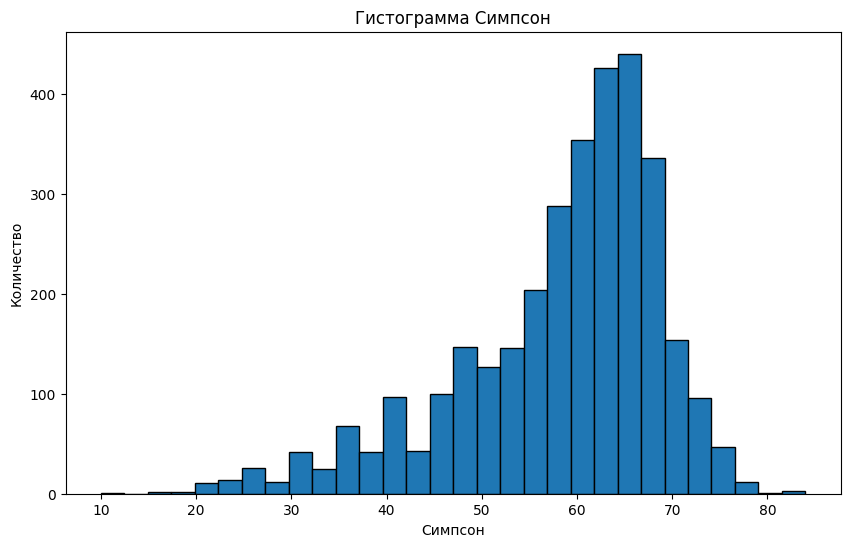

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.hist(df['Симпсон'], bins=30, edgecolor='black')
plt.xlabel('Симпсон')
plt.ylabel('Количество')
plt.title('Гистограмма Симпсон')
plt.show()

In [ ]:
df['МЖП'].value_counts()

12.0      690
13.0      550
11.0      496
14.0      356
10.0      335
15.0      204
9.0       185
16.0      107
8.0        75
17.0       49
18.0       37
7.0        28
19.0       24
21.0        7
6.0         6
20.0        5
22.0        3
24.0        2
1816.0      2
10.8        2
27.0        1
13.8        1
33.0        1
12.4        1
38.0        1
10.2        1
Name: МЖП, dtype: int64

In [ ]:
# Удаляем выбросы
df = df[df['МЖП'] < 100]

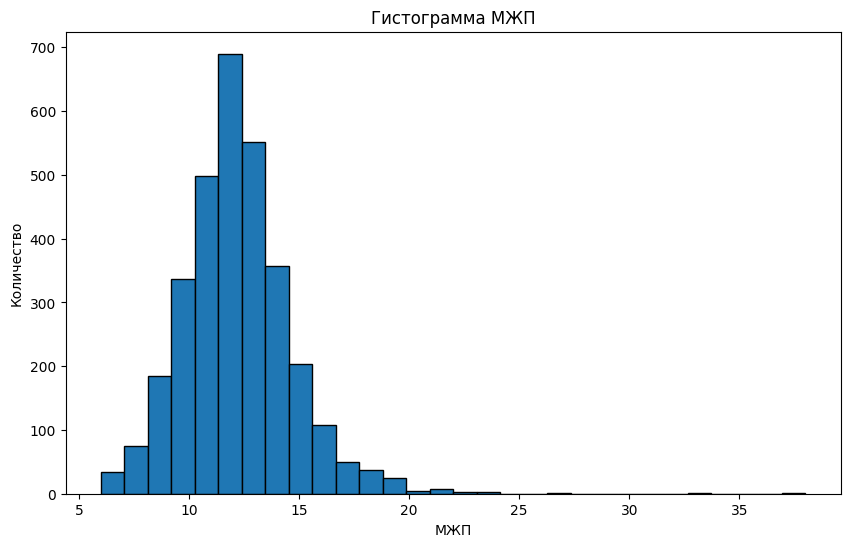

In [ ]:
plt.figure(figsize=(10,6))
plt.hist(df['МЖП'], bins=30, edgecolor='black')
plt.xlabel('МЖП')
plt.ylabel('Количество')
plt.title('Гистограмма МЖП')
plt.show()

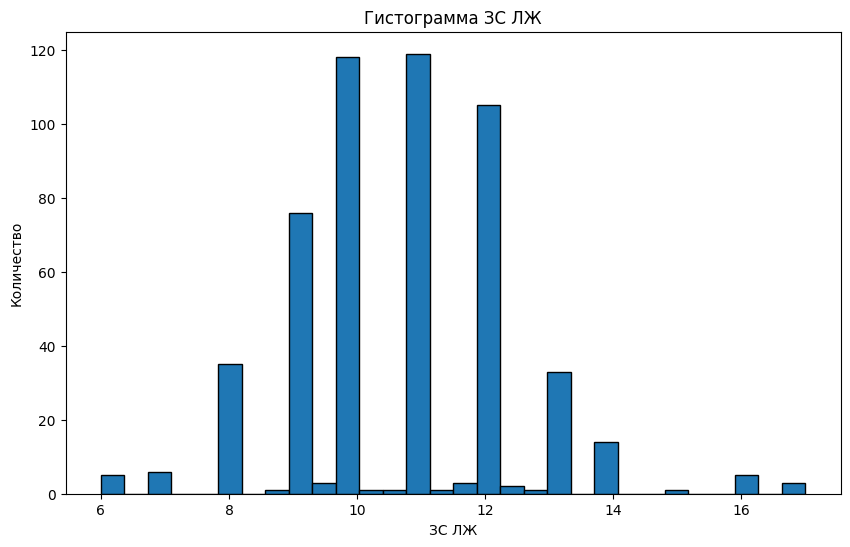

In [ ]:
plt.figure(figsize=(10,6))
plt.hist(df['ЗС ЛЖ'], bins=30, edgecolor='black')
plt.xlabel('ЗС ЛЖ')
plt.ylabel('Количество')
plt.title('Гистограмма ЗС ЛЖ')
plt.show()

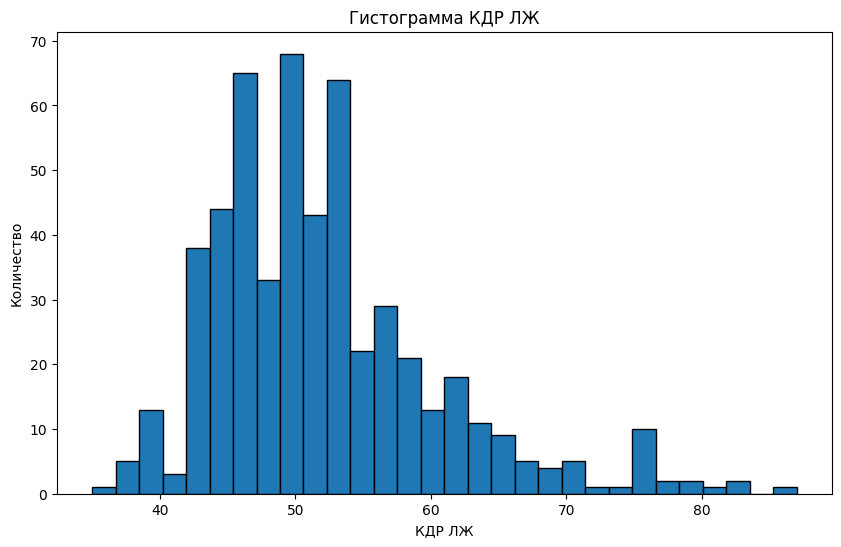

In [ ]:
plt.figure(figsize=(10,6))
plt.hist(df['КДР ЛЖ'], bins=30, edgecolor='black')
plt.xlabel('КДР ЛЖ')
plt.ylabel('Количество')
plt.title('Гистограмма КДР ЛЖ')
plt.show()

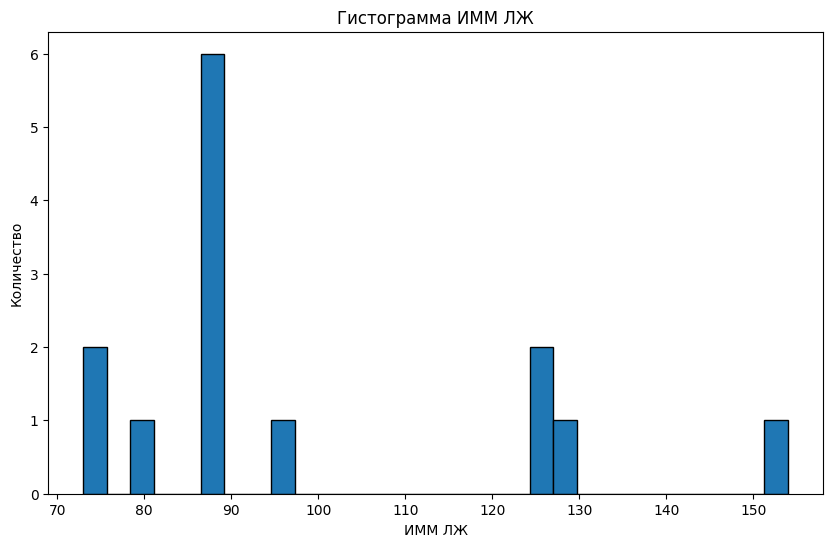

In [ ]:
plt.figure(figsize=(10,6))
plt.hist(df['ИММ ЛЖ'], bins=30, edgecolor='black')
plt.xlabel('ИММ ЛЖ')
plt.ylabel('Количество')
plt.title('Гистограмма ИММ ЛЖ')
plt.show()

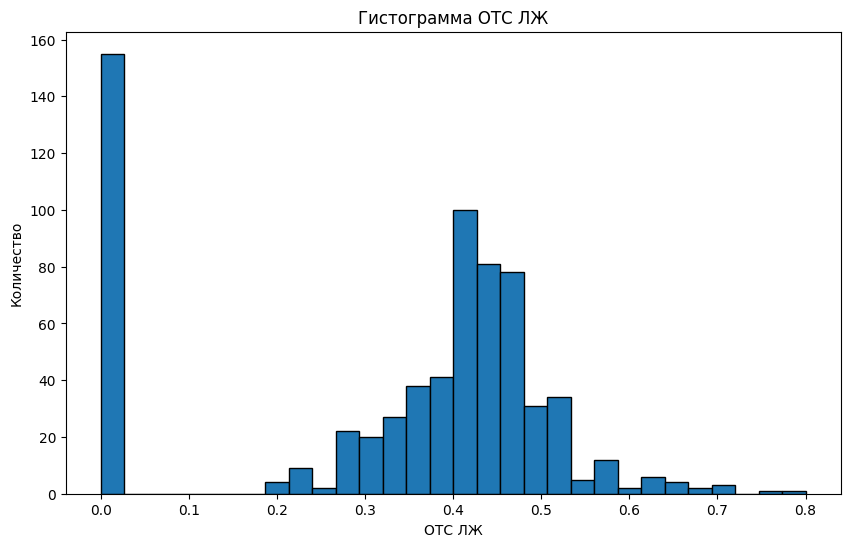

In [ ]:
plt.figure(figsize=(10,6))
plt.hist(df['ОТС ЛЖ'], bins=30, edgecolor='black')
plt.xlabel('ОТС ЛЖ')
plt.ylabel('Количество')
plt.title('Гистограмма ОТС ЛЖ')
plt.show()

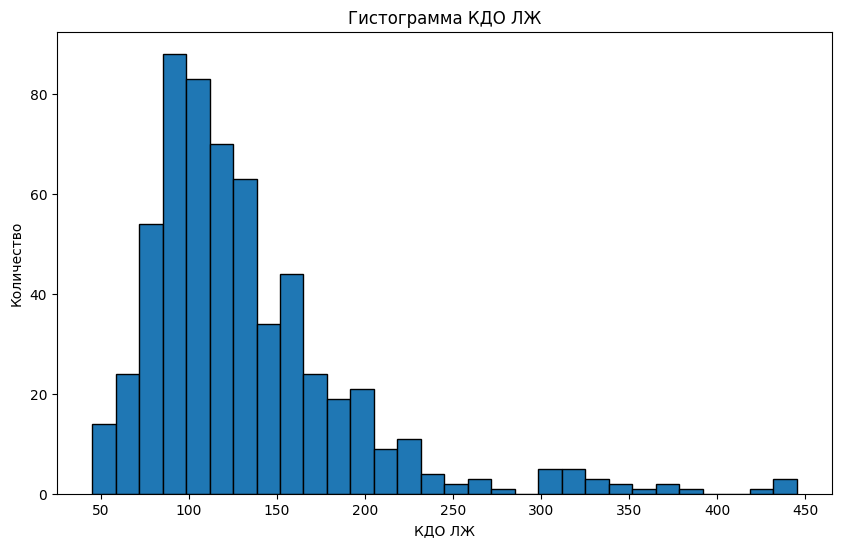

In [ ]:
plt.figure(figsize=(10,6))
plt.hist(df['КДО ЛЖ'], bins=30, edgecolor='black')
plt.xlabel('КДО ЛЖ')
plt.ylabel('Количество')
plt.title('Гистограмма КДО ЛЖ')
plt.show()

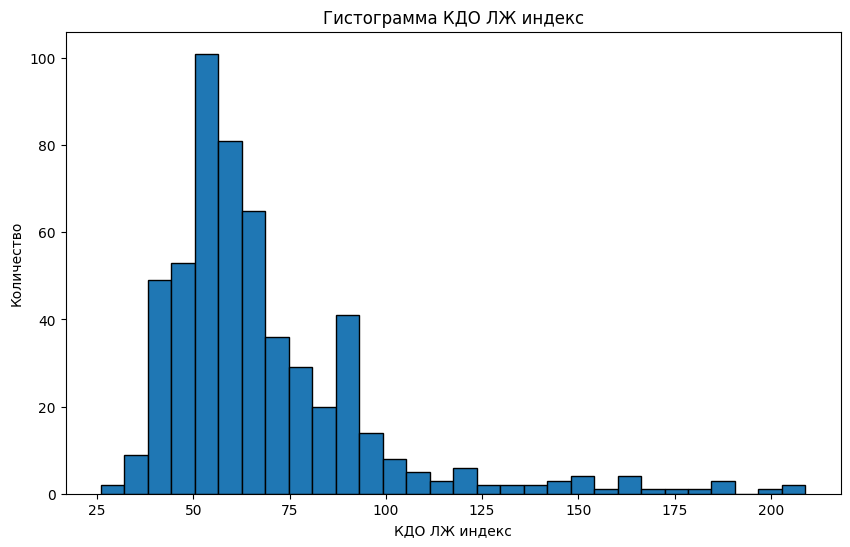

In [ ]:
plt.figure(figsize=(10,6))
plt.hist(df['КДО ЛЖ индекс'], bins=30, edgecolor='black')
plt.xlabel('КДО ЛЖ индекс')
plt.ylabel('Количество')
plt.title('Гистограмма КДО ЛЖ индекс')
plt.show()

In [ ]:
df

,Номер_эпизода,Симпсон,МЖП,ЗС ЛЖ,КДР ЛЖ,ИММ ЛЖ,ОТС ЛЖ,КДО ЛЖ,КДО ЛЖ индекс,Дата_поступления,Коррекция_дата_время,Клинический_диагноз_рубрика,Исход_эпизода,Результат_лечения,Эпизод_хэш,Пациент_хэш,Регистрационный_номер,Пол,Дата_рождения,Дата_смерти
0,1001/ВО2021,57.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,2021-02-08,2021-02-03 17:12:15,I20.0,Нет данных,Нет данных,-6196149770414151489,-1913836378333628497,78795/A20,Мужской,1966-05-08,None
1,1002/ВО2021,64.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,2021-02-08,2018-08-28 10:47:03,I20.0,Нет данных,Нет данных,-3043302809903744300,1777077507059778843,55269/B18,Женский,1967-12-12,None
2,1004/С2021,67.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,2021-01-17,2022-02-10 19:05:08,I21.4,Выписан,улучшение,873054346868597458,7200381739065554026,60481/A16,Женский,1933-06-01,None
3,1005/ВО2021,64.0,10.0,10.0,48.0,NaN,0.47,125.0,61.0,2021-02-05,2021-10-27 11:29:51,I20.0,Нет данных,Нет данных,-5030796601464647284,6852237655954067511,9290/A08,Мужской,1961-05-01,None
4,10087/С2019,50.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN,2019-04-13,2019-04-13 10:09:38,I22.0,Выписан,улучшение,6238717178641617106,-1983437426294107095,74580/A15,Женский,1943-05-06,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3377,9908/С2019,71.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN,2019-04-13,2019-04-13 17:23:43,I20.0,Выписан,улучшение,-2268177384351335633,-2894176297095657760,43240/A16,Женский,1937-10-28,None
3378,991/ВО2021,66.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,2021-02-05,2015-06-02 14:43:51,I20.0,Нет данных,Нет данных,-8289815152649864415,1879772186493299489,4573/A11,Женский,1930-08-22,None
3379,9912/С2020,60.0,14.0,12.0,48.0,NaN,0.50,110.0,51.0,2020-04-29,2020-06-11 18:21:51,I20.0,Выписан,улучшение,-5401656504829476578,4802652643454616942,30136/A13,Мужской,1962-11-30,None
3380,994/ВО2021,28.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,2021-02-07,2021-03-09 11:15:48,I20.0,Нет данных,Нет данных,3357760457421577618,-5988465376728689136,9992/A21,Женский,1938-12-24,None


In [ ]:
# Сохранение DataFrame в CSV-файл
df.to_csv('эхо (обработано).csv', index=False, encoding='Windows-1251', sep=';')

# Скачивание файла
from google.colab import files
files.download('эхо (обработано).csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Объединение таблиц

In [ ]:
import pandas as pd

df = pd.read_csv(path/'результат/новое/диагноз общий (новая).csv', encoding="Windows-1251", sep=';')
df3 = pd.read_csv(path/'результат/обработано/эхо (обработано).csv', encoding="Windows-1251", sep=';')
df4 = pd.read_csv(path/'результат/новое/коронарография (новая).csv', encoding="Windows-1251", sep=';')
df5 = pd.read_csv(path/'результат/обработано/протокол операции (обработано).csv', encoding="Windows-1251", sep=';')

In [ ]:
df.columns

Index(['Номер_эпизода', 'Исход инфаркт', 'Сахарный диабет', 'ОНМК',
       'Фибрилляция предсердий', 'ХБП', 'Депрессия', 'Отек легких',
       'Кардиогенный шок', 'ПИКС', 'ПЭКС', 'ВЭКС', 'Ожирение',
       'Атеросклероз БЦА', 'АКШ', 'ХСН', 'Облитерирующий атеросклероз',
       'Аневризма', 'Анемия', 'НАЖБП', 'ХОБЛ', 'Дата_поступления',
       'Клинический_диагноз_рубрика', 'Исход_эпизода', 'Результат_лечения',
       'Эпизод_хэш', 'Пациент_хэш', 'Регистрационный_номер', 'Пол',
       'Дата_рождения', 'Дата_смерти', 'Дата_постановки_диагноза',
       'Коррекция_дата_время', 'Диагноз'],
      dtype='object')

In [ ]:
df.shape

(3200, 34)

In [ ]:
df['Номер_эпизода'].value_counts()

Номер_эпизода
10012/С2024    1
32892/С2019    1
32776/С2021    1
32782/С2021    1
32785/С2021    1
              ..
22753/С2020    1
22777/С2018    1
22780/С2020    1
22789/С2020    1
9998/С2019     1
Name: count, Length: 3200, dtype: int64

In [ ]:
df3.columns

Index(['Номер_эпизода', 'Симпсон', 'МЖП', 'ЗС ЛЖ', 'КДР ЛЖ', 'ИММ ЛЖ',
       'ОТС ЛЖ', 'КДО ЛЖ', 'КДО ЛЖ индекс', 'Дата_поступления',
       'Коррекция_дата_время', 'Клинический_диагноз_рубрика', 'Исход_эпизода',
       'Результат_лечения', 'Эпизод_хэш', 'Пациент_хэш',
       'Регистрационный_номер', 'Пол', 'Дата_рождения', 'Дата_смерти'],
      dtype='object')

In [ ]:
df4.columns

Index(['Номер_эпизода', 'Ствол стеноз', 'Окклюзия', 'Бифуркация',
       'Количество стенозов', 'Группа стенозов', 'Дата_поступления',
       'Клинический_диагноз_рубрика', 'Исход_эпизода', 'Результат_лечения',
       'Эпизод_хэш', 'Пациент_хэш', 'Регистрационный_номер', 'Пол',
       'Дата_рождения', 'Дата_смерти', 'Статус', 'Коррекция_дата_время'],
      dtype='object')

In [ ]:
df5.columns

Index(['Номер_эпизода', 'DES', 'BMS', 'Диаметр', 'Длина', 'Дата_поступления',
       'Клинический_диагноз_рубрика', 'Исход_эпизода', 'Результат_лечения',
       'Эпизод_хэш', 'Пациент_хэш', 'Регистрационный_номер', 'Пол',
       'Дата_рождения', 'Дата_смерти'],
      dtype='object')

In [ ]:
# Определим функцию для объединения двух фреймов данных и обработки дублирующихся столбцов
def merge_dfs(df1, df2, on, how='outer', suffixes=('_df1', '_df2')):
    if isinstance(on, list):
        intersecting_columns = set(df1.columns).intersection(set(df2.columns)) - set(on)
    else:
        intersecting_columns = set(df1.columns).intersection(set(df2.columns)) - {on}
    df1 = df1.rename(columns={col: col + suffixes[0] for col in intersecting_columns})
    df2 = df2.rename(columns={col: col + suffixes[1] for col in intersecting_columns})
    merged_df = df1.merge(df2, on=on, how=how)
    for column in intersecting_columns:
        merged_df[column] = merged_df[column + suffixes[0]].combine_first(merged_df[column + suffixes[1]])
        merged_df.drop([column + suffixes[0], column + suffixes[1]], axis=1, inplace=True)
    return merged_df

In [ ]:
# Объединим все фреймы данных
df = merge_dfs(df, df3, on='Номер_эпизода', how='left')
df = merge_dfs(df, df4, on='Номер_эпизода', how='left')
df = merge_dfs(df, df5, on='Номер_эпизода', how='left')

In [ ]:
df.shape

(3200, 52)

In [ ]:
def convert_date_format(date_str):
    try:
        # Пробуем преобразовать строку в дату с форматом %d.%m.%Y
        dt = pd.to_datetime(date_str, format='%d.%m.%Y', errors='raise')
        # Если преобразование успешно, возвращаем дату в формате %Y-%m-%d
        return dt.strftime('%Y-%m-%d')
    except ValueError:
        # Если преобразование не удалось, возвращаем исходную строку
        return date_str

# Применяем функцию ко всем датам в столбцах 'Дата_поступления' и 'Дата_рождения'
df['Дата_поступления'] = df['Дата_поступления'].apply(convert_date_format)
df['Дата_рождения'] = df['Дата_рождения'].apply(convert_date_format)

In [ ]:
df['Дата_поступления'] = pd.to_datetime(df['Дата_поступления'])
df['Дата_рождения'] = pd.to_datetime(df['Дата_рождения'])

df['Возраст'] = (df['Дата_поступления'] - df['Дата_рождения']).dt.days // 365

In [ ]:
df.columns

Index(['Номер_эпизода', 'Исход инфаркт', 'Сахарный диабет', 'ОНМК',
       'Фибрилляция предсердий', 'ХБП', 'Депрессия', 'Отек легких',
       'Кардиогенный шок', 'ПИКС', 'ПЭКС', 'ВЭКС', 'Ожирение',
       'Атеросклероз БЦА', 'АКШ', 'ХСН', 'Облитерирующий атеросклероз',
       'Аневризма', 'Анемия', 'НАЖБП', 'ХОБЛ', 'Дата_постановки_диагноза',
       'Диагноз', 'Симпсон', 'МЖП', 'ЗС ЛЖ', 'КДР ЛЖ', 'ИММ ЛЖ', 'ОТС ЛЖ',
       'КДО ЛЖ', 'КДО ЛЖ индекс', 'Ствол стеноз', 'Окклюзия', 'Бифуркация',
       'Количество стенозов', 'Группа стенозов', 'Статус',
       'Коррекция_дата_время', 'DES', 'BMS', 'Диаметр', 'Длина',
       'Клинический_диагноз_рубрика', 'Дата_рождения', 'Пациент_хэш',
       'Дата_смерти', 'Исход_эпизода', 'Пол', 'Результат_лечения',
       'Регистрационный_номер', 'Дата_поступления', 'Эпизод_хэш', 'Возраст'],
      dtype='object')

In [ ]:
lab = pd.read_csv(path/'лаборатория/запрос 07.09.23.zip', compression='zip', encoding="Windows-1251", sep=';', low_memory=False)

In [ ]:
lab.columns

Index(['Номер_эпизода', 'Дата_поступления', 'Клинический_диагноз_рубрика',
       'Исход_эпизода', 'Результат_лечения', 'Эпизод_хэш', 'Пациент_хэш',
       'Тропонин_1', 'Тропонин_2', 'ЛПВП', 'ЛПОНП', 'ЛПНП', 'ХС_общ', 'СКФ',
       'креат', 'СРБ', 'Глюкоза', 'Баз_абс', 'Баз_отн', 'Эоз_абс', 'Эоз_отн',
       'Моно_абс', 'Моно_отн', 'Лимф_абс', 'Лимф_отн', 'нейтр_абс',
       'нейтр_отн', 'WBC', 'PCT', 'PDW', 'MPV', 'PLT', 'RDW_SD', 'RDW', 'HCT',
       'MCHC', 'MCH', 'MCV', 'RBC', 'Hb'],
      dtype='object')

In [ ]:
df = merge_dfs(df, lab, on='Номер_эпизода', how='left')

In [ ]:
df.shape

(3200, 86)

In [ ]:
df.columns

Index(['Номер_эпизода', 'Исход инфаркт', 'Сахарный диабет', 'ОНМК',
       'Фибрилляция предсердий', 'ХБП', 'Депрессия', 'Отек легких',
       'Кардиогенный шок', 'ПИКС', 'ПЭКС', 'ВЭКС', 'Ожирение',
       'Атеросклероз БЦА', 'АКШ', 'ХСН', 'Облитерирующий атеросклероз',
       'Аневризма', 'Анемия', 'НАЖБП', 'ХОБЛ', 'Дата_постановки_диагноза',
       'Диагноз', 'Симпсон', 'МЖП', 'ЗС ЛЖ', 'КДР ЛЖ', 'ИММ ЛЖ', 'ОТС ЛЖ',
       'КДО ЛЖ', 'КДО ЛЖ индекс', 'Ствол стеноз', 'Окклюзия', 'Бифуркация',
       'Количество стенозов', 'Группа стенозов', 'Статус',
       'Коррекция_дата_время', 'DES', 'BMS', 'Диаметр', 'Длина',
       'Дата_рождения', 'Дата_смерти', 'Пол', 'Регистрационный_номер',
       'Возраст', 'Тропонин_1', 'Тропонин_2', 'ЛПВП', 'ЛПОНП', 'ЛПНП',
       'ХС_общ', 'СКФ', 'креат', 'СРБ', 'Глюкоза', 'Баз_абс', 'Баз_отн',
       'Эоз_абс', 'Эоз_отн', 'Моно_абс', 'Моно_отн', 'Лимф_абс', 'Лимф_отн',
       'нейтр_абс', 'нейтр_отн', 'WBC', 'PCT', 'PDW', 'MPV', 'PLT', 'RDW_SD',
       'R

In [ ]:
#df = df.dropna(subset=['DES', 'BMS', 'Стеноз'])

In [ ]:
df.shape

(1804, 67)

In [ ]:
df['Исход'] = df['Исход_эпизода'].apply(lambda x: 1 if x == 'Умер' else 0)

In [ ]:
df.columns

Index(['Номер_эпизода', 'Исход инфаркт', 'Сахарный диабет', 'ОНМК',
       'Фибрилляция предсердий', 'ХБП', 'Депрессия', 'Отек легких',
       'Кардиогенный шок', 'ПИКС', 'ПЭКС', 'ВЭКС', 'Ожирение',
       'Атеросклероз БЦА', 'АКШ', 'ХСН', 'Облитерирующий атеросклероз',
       'Аневризма', 'Анемия', 'НАЖБП', 'ХОБЛ', 'Дата_постановки_диагноза',
       'Диагноз', 'Симпсон', 'МЖП', 'ЗС ЛЖ', 'КДР ЛЖ', 'ИММ ЛЖ', 'ОТС ЛЖ',
       'КДО ЛЖ', 'КДО ЛЖ индекс', 'Ствол стеноз', 'Окклюзия', 'Бифуркация',
       'Количество стенозов', 'Группа стенозов', 'Статус',
       'Коррекция_дата_время', 'DES', 'BMS', 'Диаметр', 'Длина',
       'Дата_рождения', 'Дата_смерти', 'Пол', 'Регистрационный_номер',
       'Возраст', 'Тропонин_1', 'Тропонин_2', 'ЛПВП', 'ЛПОНП', 'ЛПНП',
       'ХС_общ', 'СКФ', 'креат', 'СРБ', 'Глюкоза', 'Баз_абс', 'Баз_отн',
       'Эоз_абс', 'Эоз_отн', 'Моно_абс', 'Моно_отн', 'Лимф_абс', 'Лимф_отн',
       'нейтр_абс', 'нейтр_отн', 'WBC', 'PCT', 'PDW', 'MPV', 'PLT', 'RDW_SD',
       'R

In [ ]:
df.shape

(3200, 87)

## Добавление дополнительных таблиц

In [ ]:
import pandas as pd
import os
import unicodedata

def merge_csv_files_with_main_df(directory, main_df):
    # Получаем список всех CSV-файлов в директории
    csv_files = [f for f in os.listdir(directory) if f.endswith('.csv')]

    # Читаем каждый CSV-файл, обрабатываем его и объединяем с главным датафреймом
    for file in csv_files:
        df = pd.read_csv(os.path.join(directory, file), encoding="Windows-1251")

        # Создаем новый столбец с таким же названием, как и у файла (без расширения '.csv'), и копируем в него значения из столбца 'Значение'
        file_name_without_extension = os.path.splitext(file)[0]
        df[file_name_without_extension] = df['Значение']

        # Оставляем только два столбца: 'Номер_эпизода' и новый столбец
        df = df[['Номер_эпизода', file_name_without_extension]]

        # преобразуем названия столбцов в нормализованную форму
        df.columns = [unicodedata.normalize('NFC', col) for col in df.columns]

        # Объединяем обработанный датафрейм с главным датафреймом
        main_df = merge_dfs(main_df, df, on='Номер_эпизода', how='left')

    return main_df

directory = path/'лаборатория/дополнительные таблицы'
df = merge_csv_files_with_main_df(directory, df)

In [ ]:
directory = path/'лаборатория/новые таблицы'
df = merge_csv_files_with_main_df(directory, df)

In [ ]:
simpson1 = pd.read_csv(path/'результат/дополнительные таблицы/ФВ Симпсон 01.04.24.csv', encoding="Windows-1251")
simpson2 = pd.read_csv(path/'результат/новые таблицы/ФВ Симпсон.csv', encoding="Windows-1251")

In [ ]:
simpson = pd.concat([simpson1, simpson2])

In [ ]:
simpson

,Номер_эпизода,Статус,Unnamed: 2,Коррекция_дата_время
0,33077/С2019,ЭХОКАРДИОГРАФИЧЕСКОЕ ИССЛЕДОВАНИЕ (С РАСЧЕТАМИ...,ФВ Симпсон 47,2019-12-04 14:25:33
1,32609/С2021,ЭХОКАРДИОГРАФИЧЕСКОЕ ИССЛЕДОВАНИЕ (С РАСЧЕТАМИ...,ФВ Симпсон 57,2021-10-30 08:41:09
2,32609/С2021,ЭХОКАРДИОГРАФИЧЕСКОЕ ИССЛЕДОВАНИЕ (С РАСЧЕТАМИ...,ФВ Симпсон 60,2019-10-08 21:49:06
3,32609/С2021,ЭХОКАРДИОГРАФИЧЕСКОЕ ИССЛЕДОВАНИЕ ПОВТОРНОЕ РЕ...,ФВ Симпсон 57,2019-10-23 09:33:55
4,822/С2020,ЭХОКАРДИОГРАФИЧЕСКОЕ ИССЛЕДОВАНИЕ (С РАСЧЕТАМИ...,ФВ Симпсон 65,2019-07-12 10:39:35
...,...,...,...,...
288,22247/С2016,ЭХОКАРДИОГРАФИЧЕСКОЕ ИССЛЕДОВАНИЕ РЕЗУЛЬТАТ,ФВ Симпсон 35,2016-09-10 16:35:42
289,6789/С2016,ЭХОКАРДИОГРАФИЧЕСКОЕ ИССЛЕДОВАНИЕ РЕЗУЛЬТАТ,ФВ Симпсон 50,2016-03-14 16:06:35
290,24089/С2019,ЭХОКАРДИОГРАФИЧЕСКОЕ ИССЛЕДОВАНИЕ РЕЗУЛЬТАТ,ФВ Симпсон 32,2019-09-12 11:20:30
291,24089/С2019,ЭХОКАРДИОГРАФИЧЕСКОЕ ИССЛЕДОВАНИЕ (С РАСЧЕТАМИ...,ФВ Симпсон 33,2019-09-20 11:26:07


In [ ]:
simpson['Симпсон'] = simpson['Unnamed: 2'].str.extract('(\d+)').astype(int)  # Создаем новый столбец 'Симпсон', извлекая числа из 'Unnamed: 2'

# Преобразуем 'Коррекция_дата_время' в формат datetime
simpson['Коррекция_дата_время'] = pd.to_datetime(simpson['Коррекция_дата_время'])

# Сортируем по 'Номер_эпизода' и 'Коррекция_дата_время', затем оставляем только первую запись для каждого 'Номер_эпизода'
simpson = simpson.sort_values(['Номер_эпизода', 'Коррекция_дата_время']).groupby('Номер_эпизода').first().reset_index()

# Оставляем только столбцы 'Номер_эпизода' и 'Симпсон'
simpson = simpson[['Номер_эпизода', 'Симпсон']]

In [ ]:
simpson

,Номер_эпизода,Симпсон
0,101/С2021,56
1,10208/С2021,42
2,10248/С2021,35
3,10317/С2015,57
4,10326/С2021,59
...,...,...
747,9926/С2020,62
748,9948/С2018,39
749,996/С2021,60
750,9986/С2021,56


In [ ]:
df = merge_dfs(df, simpson, on='Номер_эпизода', how='left')

In [ ]:
df.shape

(3200, 87)

In [ ]:
df

,Номер_эпизода,Исход инфаркт,Сахарный диабет,ОНМК,Фибрилляция предсердий,ХБП,Депрессия,Отек легких,Кардиогенный шок,ПИКС,...,PCT,ЛПВП,Моно_абс,Моно_отн,Глюкоза,нейтр_отн,ЛПОНП,ЛПНП,креат,Симпсон
0,10012/С2024,0,1,0,0,1,0,1,0,0,...,0.138,NaN,0.51,4.5,NaN,89.3,NaN,NaN,203.0,NaN
1,1004/С2021,0,0,0,0,0,0,0,0,1,...,0.173,NaN,0.32,4.5,NaN,71.2,NaN,NaN,92.0,67.0
2,10087/С2019,0,0,1,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.0
3,10090/С2019,0,1,0,0,0,1,0,0,0,...,0.200,0.94,0.55,7.1,NaN,67.5,2.83,1.82,52.0,55.0
4,101/С2021,0,1,0,0,0,0,0,0,0,...,0.197,1.11,0.37,4.5,NaN,66.7,1.28,2.26,58.00,56.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3195,996/С2021,0,0,1,1,0,1,0,0,0,...,0.186,1.55,0.67,6.5,NaN,68.5,0.56,4.24,120.00,60.0
3196,9973/С2020,0,0,1,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3197,9986/С2021,0,1,0,0,0,0,0,0,0,...,0.213,0.87,0.46,6.8,13.38,51.1,2.72,1.72,66.90,56.0
3198,9992/С2015,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,112.0,40.0


In [ ]:
df['Тропонин_2'] = df['Тропонин_2'].fillna(df['Тропонин_1'])

In [ ]:
df['Исход'].value_counts()

Исход
0    2991
1     209
Name: count, dtype: int64

In [ ]:
df['Исход инфаркт'].value_counts()

Исход инфаркт
0    3147
1      53
Name: count, dtype: int64

In [ ]:
df['Сахарный диабет'].value_counts()

Сахарный диабет
0    2379
1     821
Name: count, dtype: int64

In [ ]:
df['ОНМК'].value_counts()

ОНМК
0    2799
1     401
Name: count, dtype: int64

In [ ]:
df['Фибрилляция предсердий'].value_counts()

Фибрилляция предсердий
0    2866
1     334
Name: count, dtype: int64

In [ ]:
df['ХБП'].value_counts()

ХБП
0    2843
1     357
Name: count, dtype: int64

In [ ]:
df['Стеноз'].value_counts()

Стеноз
0.0    1304
1.0     500
Name: count, dtype: int64

Было   
0.0 - 1120   
1.0 - 684

In [ ]:
df['Окклюзия'].value_counts()

Окклюзия
0.0    940
1.0    864
Name: count, dtype: int64

In [ ]:
df['Бифуркация'].value_counts()

Бифуркация
0.0    1439
1.0     365
Name: count, dtype: int64

In [ ]:
df['DES'].value_counts()

DES
0.0    1401
1.0     354
2.0      43
3.0       6
Name: count, dtype: int64

In [ ]:
df['BMS'].value_counts()

BMS
0.0    1752
1.0      49
2.0       3
Name: count, dtype: int64

In [ ]:
df['Диаметр'].isna().sum() ## БЕСПОЛЕЗНЫЙ СТОЛБЕЦ

1560

In [ ]:
df['Длина'].isna().sum() ## БЕСПОЛЕЗНЫЙ СТОЛБЕЦ

1560

In [ ]:
df['Симпсон'].isna().sum()

81

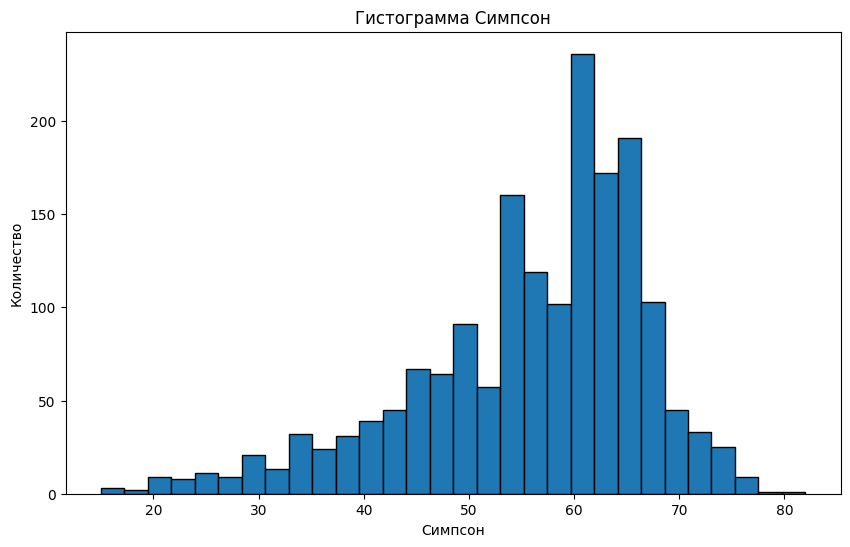

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.hist(df['Симпсон'], bins=30, edgecolor='black')
plt.xlabel('Симпсон')
plt.ylabel('Количество')
plt.title('Гистограмма Симпсон')
plt.show()

In [ ]:
df['МЖП'].isna().sum() ## ПРОПУСКОВ МЕНЬШЕ ПОЛОВИНЫ

717

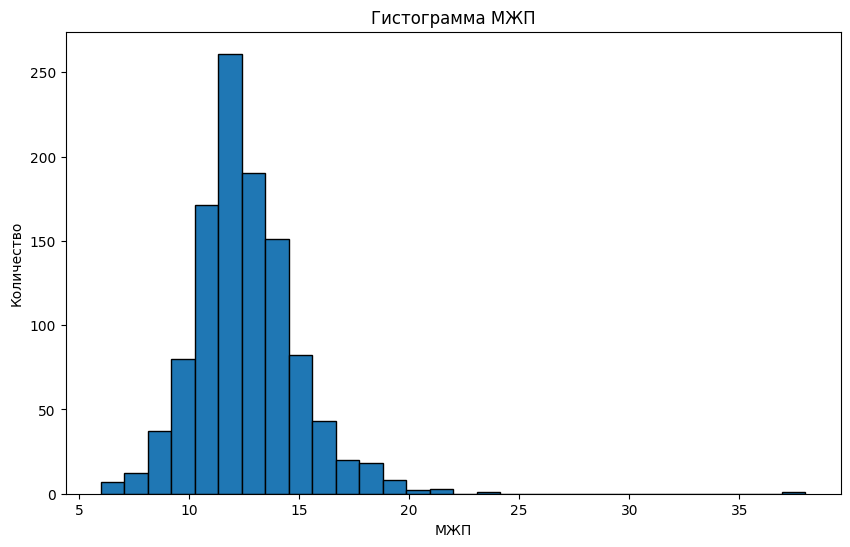

In [ ]:
plt.figure(figsize=(10,6))
plt.hist(df['МЖП'], bins=30, edgecolor='black')
plt.xlabel('МЖП')
plt.ylabel('Количество')
plt.title('Гистограмма МЖП')
plt.show()

In [ ]:
df['ЗС ЛЖ'].isna().sum() ## БЕСПОЛЕЗНЫЙ СТОЛБЕЦ

1588

In [ ]:
df['КДР ЛЖ'].isna().sum() ## БЕСПОЛЕЗНЫЙ СТОЛБЕЦ

1587

In [ ]:
df['ИММ ЛЖ'].isna().sum() ## БЕСПОЛЕЗНЫЙ СТОЛБЕЦ

1799

In [ ]:
df['ОТС ЛЖ'].isna().sum() ## БЕСПОЛЕЗНЫЙ СТОЛБЕЦ

1558

In [ ]:
df['КДО ЛЖ'].isna().sum() ## БЕСПОЛЕЗНЫЙ СТОЛБЕЦ

1570

In [ ]:
df['КДО ЛЖ индекс'].isna().sum() ## БЕСПОЛЕЗНЫЙ СТОЛБЕЦ

1582

ДАЛЕЕ ИДЁТ ЛАБОРАТОРИЯ

In [ ]:
df['Тропонин_1'].isna().sum()

14

In [ ]:
df['Тропонин_2'].isna().sum()

14

In [ ]:
df['ЛПВП'].isna().sum()

293

In [ ]:
df['ЛПОНП'].isna().sum()

294

In [ ]:
df['ЛПНП'].isna().sum()

285

In [ ]:
df['ХС_общ'].isna().sum()

260

In [ ]:
df['СКФ'].isna().sum() ## ПРОПУСКОВ МЕНЬШЕ ПОЛОВИНЫ

618

In [ ]:
df['креат'].isna().sum()

68

In [ ]:
df['СРБ'].isna().sum()

237

In [ ]:
df['Глюкоза'].isna().sum() ## ПРОПУСКОВ ПОЧТИ ПОЛОВИНА

875

In [ ]:
df['Баз_абс'].isna().sum()

13

In [ ]:
df['Баз_отн'].isna().sum()

13

In [ ]:
df['Эоз_абс'].isna().sum()

13

In [ ]:
df['Эоз_отн'].isna().sum()

13

In [ ]:
df['Моно_абс'].isna().sum()

12

In [ ]:
df['Моно_отн'].isna().sum()

12

In [ ]:
df['Лимф_абс'].isna().sum()

6

In [ ]:
df['Лимф_отн'].isna().sum()

6

In [ ]:
df['нейтр_абс'].isna().sum()

7

In [ ]:
df['нейтр_отн'].isna().sum()

7

In [ ]:
df['WBC'].isna().sum()

6

In [ ]:
df['PCT'].isna().sum()

14

In [ ]:
df['PDW'].isna().sum()

7

In [ ]:
df['MPV'].isna().sum()

7

In [ ]:
df['PLT'].isna().sum()

6

In [ ]:
df['RDW_SD'].isna().sum()

268

In [ ]:
df['RDW'].isna().sum() ## ПРОПУСКОВ МЕНЬШЕ ПОЛОВИНЫ

537

In [ ]:
df['HCT'].isna().sum()

6

In [ ]:
df['MCHC'].isna().sum()

6

In [ ]:
df['MCH'].isna().sum()

6

In [ ]:
df['MCV'].isna().sum()

6

In [ ]:
df['RBC'].isna().sum()

6

In [ ]:
df['Hb'].isna().sum()

6

In [ ]:
df.shape

(1804, 68)

In [ ]:
df

,Номер_эпизода,Исход инфаркт,Сахарный диабет,ОНМК,Фибрилляция предсердий,ХБП,Дата_постановки_диагноза,МЖП,ЗС ЛЖ,КДР ЛЖ,...,СКФ,Тропонин_2,ХС_общ,Эоз_абс,Эоз_отн,Тропонин_1,нейтр_абс,нейтр_отн,RDW_SD,Симпсон
0,1004/С2021,0,0,0,0,0,2021-02-16,15.0,NaN,NaN,...,53.30,3.130,NaN,0.02,0.3,0.470,5.06,71.2,45.0,67.0
1,10090/С2019,0,1,0,0,0,29.04.2019,13.0,NaN,NaN,...,NaN,1.630,5.59,0.17,2.2,1.920,5.27,67.5,NaN,55.0
2,101/С2021,0,1,0,0,0,2021-01-08,NaN,NaN,NaN,...,142.52,0.340,4.65,0.06,0.7,0.070,5.54,66.7,41.1,56.0
3,10416/С2021,0,0,0,0,0,2021-04-21,NaN,NaN,NaN,...,65.27,40.640,4.37,0.13,1.0,13.6340,8.20,64.6,42.6,32.0
4,10686/С2021,1,1,0,0,1,2021-05-06,NaN,NaN,NaN,...,57.82,15.3560,3.34,0.32,2.9,0.010,6.00,54.5,56.3,47.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1799,984/С2020,0,0,0,0,0,2020-01-29,16.0,12.0,57.0,...,NaN,0.010,3.75,0.13,2.7,0.010,2.83,60.2,NaN,61.0
1800,9849/С2020,0,0,0,0,0,2020-05-07,12.0,NaN,NaN,...,81.73,0.000,4.31,0.11,1.2,0.000,4.71,53.5,38.8,67.0
1801,9896/С2020,0,0,1,0,0,2020-05-07,14.0,NaN,NaN,...,NaN,0.650,4.55,0.11,1.5,0.410,3.86,53.6,48.9,60.0
1802,9926/С2020,0,0,1,1,0,2020-05-07,NaN,NaN,NaN,...,NaN,0.020,4.25,0.12,1.8,0.020,3.33,49.0,41.3,62.0


In [ ]:
# Сохранение DataFrame в CSV-файл
df.to_csv('new_dataset.csv', index=False, encoding='Windows-1251', sep=';')

# Скачивание файла
from google.colab import files
files.download('new_dataset.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>